In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# print(os.listdir("../input"))

In [2]:
import torch
model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
model.eval()

Using cache found in /home/katsuyut/.cache/torch/hub/pytorch_vision_master


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
root_images = '../output_images/crop3_200epoch/'

In [4]:
from PIL import Image
from torchvision import transforms
i=0
results = []
all_images=os.listdir(root_images)
for image in all_images:
    result = []
    input_image=Image.open(os.path.join(root_images,image))

    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)

    prob = torch.nn.functional.softmax(output[0], dim=0)

    maxprob = np.max(prob.cpu().numpy())
    dogprob = np.sum(prob.cpu().numpy()[151:269])
    prediction = np.argmax(prob.cpu().numpy())
    isdog = (prediction <= 268) & (prediction >= 151)

    if isdog:
        if dogprob > 0.8:
            iscertainlydog = True 
        else:
            iscertainlydog = False
    else:
        iscertainlydog = False

    result = [image, prediction, isdog, iscertainlydog, maxprob, dogprob]
    results.append(result)
    i += 1
    print(i, result)
    # (prediction <= 268) & (prediction >= 151)

1 ['image_00000.png', 241, True, True, 0.90942353, 0.910598]
2 ['image_00001.png', 345, False, False, 0.5597929, 0.035621077]
3 ['image_00002.png', 236, True, True, 0.81622374, 1.0000001]
4 ['image_00003.png', 449, False, False, 0.41520625, 0.0035167618]
5 ['image_00004.png', 247, True, True, 1.0, 1.0]
6 ['image_00005.png', 580, False, False, 0.9814714, 5.3457547e-06]
7 ['image_00006.png', 125, False, False, 0.47339565, 0.27192602]
8 ['image_00007.png', 865, False, False, 0.99574006, 6.006675e-06]
9 ['image_00008.png', 216, True, True, 0.9999989, 0.99999994]
10 ['image_00009.png', 273, False, False, 0.81568545, 0.0021433367]
11 ['image_00010.png', 562, False, False, 0.3089679, 0.00027193234]
12 ['image_00011.png', 128, False, False, 0.8376189, 3.4575535e-18]
13 ['image_00012.png', 920, False, False, 0.38423187, 0.030903025]
14 ['image_00013.png', 537, False, False, 0.9978689, 4.6272297e-07]
15 ['image_00014.png', 423, False, False, 0.4621867, 0.0073215473]
16 ['image_00015.png', 571, F

127 ['image_00126.png', 818, False, False, 0.03352693, 0.06821414]
128 ['image_00127.png', 238, True, True, 0.96038437, 0.9996091]
129 ['image_00128.png', 139, False, False, 0.8161214, 2.7517175e-09]
130 ['image_00129.png', 880, False, False, 0.9083224, 0.08574766]
131 ['image_00130.png', 857, False, False, 0.9754225, 7.024279e-09]
132 ['image_00131.png', 237, True, True, 0.8498071, 1.0]
133 ['image_00132.png', 237, True, True, 0.9851753, 0.9988844]
134 ['image_00133.png', 232, True, True, 0.79831505, 0.9994562]
135 ['image_00134.png', 467, False, False, 0.8756176, 8.081679e-09]
136 ['image_00135.png', 195, True, True, 1.0, 1.0]
137 ['image_00136.png', 920, False, False, 0.23403186, 0.0064450954]
138 ['image_00137.png', 241, True, True, 0.77607524, 0.8302316]
139 ['image_00138.png', 467, False, False, 0.5817819, 0.0025657588]
140 ['image_00139.png', 649, False, False, 0.6511782, 1.6999285e-05]
141 ['image_00140.png', 237, True, True, 0.999511, 1.0]
142 ['image_00141.png', 202, True, Fa

252 ['image_00251.png', 171, True, True, 0.99044025, 0.9991057]
253 ['image_00252.png', 220, True, True, 0.99379456, 1.0]
254 ['image_00253.png', 237, True, True, 0.5051775, 0.9998065]
255 ['image_00254.png', 225, True, True, 0.88128144, 0.9774432]
256 ['image_00255.png', 237, True, True, 0.80223984, 1.0]
257 ['image_00256.png', 164, True, True, 0.39978892, 0.9989348]
258 ['image_00257.png', 444, False, False, 0.96612763, 5.988463e-07]
259 ['image_00258.png', 766, False, False, 0.594859, 2.6034968e-05]
260 ['image_00259.png', 238, True, True, 0.99605197, 1.0]
261 ['image_00260.png', 97, False, False, 0.9559459, 8.425245e-08]
262 ['image_00261.png', 206, True, True, 0.6445496, 0.9996752]
263 ['image_00262.png', 241, True, True, 0.99705815, 1.0]
264 ['image_00263.png', 151, True, True, 0.9982653, 1.0]
265 ['image_00264.png', 802, False, False, 0.42414257, 0.006301089]
266 ['image_00265.png', 819, False, False, 0.38502148, 0.008043285]
267 ['image_00266.png', 93, False, False, 0.8665062, 

377 ['image_00376.png', 580, False, False, 0.52547663, 0.0003604927]
378 ['image_00377.png', 237, True, True, 0.8483664, 0.9939191]
379 ['image_00378.png', 716, False, False, 0.09287449, 0.0612677]
380 ['image_00379.png', 176, True, True, 0.9824651, 0.9999844]
381 ['image_00380.png', 653, False, False, 0.90516126, 1.1604551e-08]
382 ['image_00381.png', 546, False, False, 0.53263664, 0.00015669153]
383 ['image_00382.png', 124, False, False, 0.99582195, 7.157349e-10]
384 ['image_00383.png', 467, False, False, 0.9482323, 0.00046316962]
385 ['image_00384.png', 213, True, True, 0.8495989, 1.0]
386 ['image_00385.png', 649, False, False, 0.8455629, 0.00058380625]
387 ['image_00386.png', 241, True, True, 0.9608965, 0.9999431]
388 ['image_00387.png', 467, False, False, 0.9997842, 6.3057e-06]
389 ['image_00388.png', 215, True, True, 1.0, 1.0]
390 ['image_00389.png', 122, False, False, 0.8675874, 3.6877078e-11]
391 ['image_00390.png', 236, True, True, 0.4870577, 0.9999828]
392 ['image_00391.png',

503 ['image_00502.png', 130, False, False, 0.99989855, 6.991808e-05]
504 ['image_00503.png', 173, True, False, 0.536283, 0.7182286]
505 ['image_00504.png', 280, False, False, 0.20599703, 0.012798782]
506 ['image_00505.png', 15, False, False, 0.9960835, 2.9291435e-18]
507 ['image_00506.png', 110, False, False, 0.6598501, 0.0036267955]
508 ['image_00507.png', 238, True, True, 0.99999905, 1.0]
509 ['image_00508.png', 540, False, False, 0.9041414, 2.0146174e-06]
510 ['image_00509.png', 971, False, False, 0.732469, 0.021036353]
511 ['image_00510.png', 223, True, True, 0.49562848, 0.8512341]
512 ['image_00511.png', 573, False, False, 0.5035963, 6.899238e-08]
513 ['image_00512.png', 8, False, False, 0.9999846, 3.285539e-06]
514 ['image_00513.png', 890, False, False, 0.8729412, 0.00018751725]
515 ['image_00514.png', 444, False, False, 0.9997788, 2.7738237e-12]
516 ['image_00515.png', 862, False, False, 0.96391296, 0.019164998]
517 ['image_00516.png', 178, True, True, 0.98815596, 1.0000001]
518

628 ['image_00627.png', 537, False, False, 0.98591274, 1.6158905e-08]
629 ['image_00628.png', 649, False, False, 0.9999709, 1.6928993e-08]
630 ['image_00629.png', 818, False, False, 0.082746096, 0.019790903]
631 ['image_00630.png', 500, False, False, 0.9952674, 8.631301e-08]
632 ['image_00631.png', 424, False, False, 0.8338434, 1.2404775e-05]
633 ['image_00632.png', 492, False, False, 0.9628439, 7.979522e-11]
634 ['image_00633.png', 889, False, False, 0.70734745, 2.2642631e-07]
635 ['image_00634.png', 971, False, False, 0.9777468, 0.0015531655]
636 ['image_00635.png', 399, False, False, 0.991137, 4.7334448e-05]
637 ['image_00636.png', 151, True, True, 0.9925256, 0.99999994]
638 ['image_00637.png', 607, False, False, 0.45396742, 0.0002118844]
639 ['image_00638.png', 213, True, True, 0.502423, 0.99879295]
640 ['image_00639.png', 607, False, False, 0.78705055, 0.00013069712]
641 ['image_00640.png', 580, False, False, 0.40708116, 0.0022711167]
642 ['image_00641.png', 265, True, True, 0.928

752 ['image_00751.png', 546, False, False, 0.17875694, 0.00072466617]
753 ['image_00752.png', 766, False, False, 1.0, 6.3023775e-19]
754 ['image_00753.png', 241, True, False, 0.40669125, 0.60857314]
755 ['image_00754.png', 727, False, False, 0.7019826, 9.57961e-05]
756 ['image_00755.png', 546, False, False, 0.6354022, 0.0020463292]
757 ['image_00756.png', 652, False, False, 0.9239432, 4.4717657e-05]
758 ['image_00757.png', 223, True, True, 0.79864186, 0.99999994]
759 ['image_00758.png', 795, False, False, 0.36702007, 0.00691469]
760 ['image_00759.png', 537, False, False, 0.7054221, 0.16652757]
761 ['image_00760.png', 220, True, True, 0.9860161, 0.99999994]
762 ['image_00761.png', 703, False, False, 0.67778736, 0.00019858945]
763 ['image_00762.png', 145, False, False, 0.39956686, 1.9803603e-05]
764 ['image_00763.png', 345, False, False, 0.49827972, 0.001855363]
765 ['image_00764.png', 643, False, False, 0.474319, 3.105548e-07]
766 ['image_00765.png', 122, False, False, 0.98788303, 1.525

875 ['image_00874.png', 865, False, False, 0.46701118, 0.009966929]
876 ['image_00875.png', 579, False, False, 0.99998975, 7.0150804e-08]
877 ['image_00876.png', 546, False, False, 0.95572484, 1.076437e-05]
878 ['image_00877.png', 156, True, True, 0.99922657, 1.0]
879 ['image_00878.png', 180, True, True, 0.997271, 1.0]
880 ['image_00879.png', 385, False, False, 0.36631396, 0.00045112884]
881 ['image_00880.png', 332, False, False, 0.9999963, 1.5739816e-17]
882 ['image_00881.png', 802, False, False, 0.85590005, 0.0007806349]
883 ['image_00882.png', 425, False, False, 0.8800099, 0.00014837383]
884 ['image_00883.png', 579, False, False, 0.38584858, 0.0071756123]
885 ['image_00884.png', 819, False, False, 0.69347316, 0.0025047425]
886 ['image_00885.png', 634, False, False, 0.97861254, 5.682322e-11]
887 ['image_00886.png', 118, False, False, 0.51552117, 3.610735e-06]
888 ['image_00887.png', 703, False, False, 0.6600747, 0.0016272845]
889 ['image_00888.png', 137, False, False, 0.518638, 8.807

1000 ['image_00999.png', 642, False, False, 0.6102019, 5.1871502e-06]
1001 ['image_01000.png', 365, False, False, 0.20527568, 0.4922709]
1002 ['image_01001.png', 552, False, False, 0.45469385, 0.0024509197]
1003 ['image_01002.png', 399, False, False, 0.4555272, 0.00027939954]
1004 ['image_01003.png', 354, False, False, 0.5122552, 0.0040151975]
1005 ['image_01004.png', 97, False, False, 0.4582211, 0.06777637]
1006 ['image_01005.png', 819, False, False, 0.47194296, 0.00079108187]
1007 ['image_01006.png', 156, True, True, 0.9999999, 1.0]
1008 ['image_01007.png', 842, False, False, 0.4139984, 4.0462962e-07]
1009 ['image_01008.png', 643, False, False, 0.99999464, 4.3273299e-16]
1010 ['image_01009.png', 213, True, True, 1.0, 1.0]
1011 ['image_01010.png', 264, True, True, 0.9702599, 0.99999994]
1012 ['image_01011.png', 164, True, True, 0.54399675, 0.9322125]
1013 ['image_01012.png', 607, False, False, 0.73398006, 1.6299441e-07]
1014 ['image_01013.png', 703, False, False, 0.22866575, 0.0083554

1123 ['image_01122.png', 130, False, False, 0.41497827, 0.011294271]
1124 ['image_01123.png', 576, False, False, 0.8460281, 1.8741829e-06]
1125 ['image_01124.png', 795, False, False, 0.58410436, 0.00010299922]
1126 ['image_01125.png', 766, False, False, 0.787803, 2.459524e-05]
1127 ['image_01126.png', 258, True, True, 0.80262905, 0.9997726]
1128 ['image_01127.png', 267, True, True, 0.99970824, 1.0]
1129 ['image_01128.png', 537, False, False, 1.0, 4.2565937e-09]
1130 ['image_01129.png', 236, True, False, 0.6106806, 0.6257659]
1131 ['image_01130.png', 716, False, False, 0.95527285, 2.8422319e-08]
1132 ['image_01131.png', 321, False, False, 0.99130553, 0.008415893]
1133 ['image_01132.png', 576, False, False, 0.9518502, 0.041011814]
1134 ['image_01133.png', 579, False, False, 0.6131242, 3.2251297e-05]
1135 ['image_01134.png', 537, False, False, 0.999985, 1.976821e-06]
1136 ['image_01135.png', 365, False, False, 0.96759427, 0.011730817]
1137 ['image_01136.png', 195, True, True, 0.99998343, 

1247 ['image_01246.png', 913, False, False, 0.4143172, 3.5560068e-05]
1248 ['image_01247.png', 241, True, True, 0.8207408, 0.955766]
1249 ['image_01248.png', 156, True, True, 0.98930895, 1.0]
1250 ['image_01249.png', 241, True, True, 0.99785066, 1.0000001]
1251 ['image_01250.png', 802, False, False, 0.9905069, 1.410588e-07]
1252 ['image_01251.png', 151, True, False, 0.66345495, 0.66673434]
1253 ['image_01252.png', 196, True, True, 0.99700505, 1.0]
1254 ['image_01253.png', 163, True, True, 0.9902294, 1.0000001]
1255 ['image_01254.png', 672, False, False, 0.21261741, 0.0012948033]
1256 ['image_01255.png', 241, True, False, 0.7206819, 0.7546987]
1257 ['image_01256.png', 212, True, True, 0.6851207, 1.0]
1258 ['image_01257.png', 239, True, True, 0.9205015, 0.9543245]
1259 ['image_01258.png', 264, True, True, 0.81408256, 0.9999998]
1260 ['image_01259.png', 217, True, True, 1.0, 1.0]
1261 ['image_01260.png', 576, False, False, 0.7885758, 7.855592e-09]
1262 ['image_01261.png', 199, True, True,

1371 ['image_01370.png', 525, False, False, 0.40769458, 1.0572292e-08]
1372 ['image_01371.png', 143, False, False, 0.8953545, 0.077426456]
1373 ['image_01372.png', 155, True, True, 0.61097413, 0.99999946]
1374 ['image_01373.png', 423, False, False, 0.7124394, 6.025563e-08]
1375 ['image_01374.png', 448, False, False, 0.8696643, 5.156576e-05]
1376 ['image_01375.png', 971, False, False, 0.99999905, 2.1653335e-09]
1377 ['image_01376.png', 129, False, False, 0.9196346, 8.590789e-08]
1378 ['image_01377.png', 376, False, False, 0.76652294, 0.00028509786]
1379 ['image_01378.png', 584, False, False, 0.9999448, 1.218749e-13]
1380 ['image_01379.png', 195, True, True, 0.916695, 0.9995782]
1381 ['image_01380.png', 818, False, False, 0.06458248, 0.022661345]
1382 ['image_01381.png', 221, True, True, 0.70802623, 0.99999994]
1383 ['image_01382.png', 122, False, False, 0.9989548, 5.9937005e-10]
1384 ['image_01383.png', 571, False, False, 0.35454822, 2.9029113e-07]
1385 ['image_01384.png', 982, False, F

1494 ['image_01493.png', 982, False, False, 0.9400152, 1.9773869e-07]
1495 ['image_01494.png', 819, False, False, 0.34445712, 2.905563e-05]
1496 ['image_01495.png', 264, True, True, 0.9550839, 1.0000001]
1497 ['image_01496.png', 358, False, False, 0.9239606, 1.521061e-09]
1498 ['image_01497.png', 294, False, False, 0.78522295, 0.023562973]
1499 ['image_01498.png', 213, True, False, 0.40442103, 0.4065059]
1500 ['image_01499.png', 449, False, False, 0.34158352, 1.495882e-08]
1501 ['image_01500.png', 552, False, False, 0.5043823, 8.8283895e-07]
1502 ['image_01501.png', 440, False, False, 0.4898277, 2.8878155e-06]
1503 ['image_01502.png', 843, False, False, 0.90825737, 0.023266986]
1504 ['image_01503.png', 467, False, False, 0.42063743, 2.0257545e-05]
1505 ['image_01504.png', 399, False, False, 0.999982, 4.20722e-11]
1506 ['image_01505.png', 238, True, True, 0.99122345, 1.0]
1507 ['image_01506.png', 238, True, True, 0.41338617, 0.9505494]
1508 ['image_01507.png', 242, True, True, 0.9994636

1617 ['image_01616.png', 467, False, False, 0.9735073, 2.8104274e-11]
1618 ['image_01617.png', 245, True, True, 0.9999833, 1.0]
1619 ['image_01618.png', 100, False, False, 0.33224922, 0.020409571]
1620 ['image_01619.png', 263, True, True, 0.94865566, 0.9999998]
1621 ['image_01620.png', 728, False, False, 0.42273027, 0.0012158853]
1622 ['image_01621.png', 444, False, False, 0.9146492, 2.503077e-08]
1623 ['image_01622.png', 239, True, True, 0.5959323, 0.99969435]
1624 ['image_01623.png', 249, True, True, 0.8434294, 1.0]
1625 ['image_01624.png', 250, True, False, 0.37802136, 0.64049256]
1626 ['image_01625.png', 375, False, False, 0.56705797, 0.001248713]
1627 ['image_01626.png', 576, False, False, 0.879613, 2.1956416e-06]
1628 ['image_01627.png', 247, True, True, 0.76265746, 1.0]
1629 ['image_01628.png', 788, False, False, 0.998572, 1.8524048e-08]
1630 ['image_01629.png', 818, False, False, 0.27694824, 0.03325334]
1631 ['image_01630.png', 980, False, False, 0.19741623, 0.017353253]
1632 [

1739 ['image_01738.png', 122, False, False, 0.6399943, 5.1695096e-08]
1740 ['image_01739.png', 234, True, True, 0.9404802, 0.9600652]
1741 ['image_01740.png', 137, False, False, 0.59107316, 0.00027483742]
1742 ['image_01741.png', 971, False, False, 0.50400233, 0.0022999474]
1743 ['image_01742.png', 241, True, True, 0.8977102, 0.9999197]
1744 ['image_01743.png', 819, False, False, 0.9414022, 4.72197e-05]
1745 ['image_01744.png', 444, False, False, 0.9884015, 0.00030958615]
1746 ['image_01745.png', 688, False, False, 0.82724977, 6.442081e-05]
1747 ['image_01746.png', 388, False, False, 0.5859507, 0.03226696]
1748 ['image_01747.png', 360, False, False, 0.99722856, 0.0009722269]
1749 ['image_01748.png', 580, False, False, 0.23981829, 0.0022686524]
1750 ['image_01749.png', 310, False, False, 0.9424782, 2.4787155e-06]
1751 ['image_01750.png', 97, False, False, 0.5059825, 0.44511878]
1752 ['image_01751.png', 344, False, False, 0.99999595, 2.6602373e-07]
1753 ['image_01752.png', 213, True, Tru

1861 ['image_01860.png', 238, True, True, 0.90012956, 1.0]
1862 ['image_01861.png', 241, True, True, 0.9986739, 0.99992245]
1863 ['image_01862.png', 876, False, False, 0.9293674, 0.00084388047]
1864 ['image_01863.png', 384, False, False, 0.9983975, 0.0016022862]
1865 ['image_01864.png', 880, False, False, 0.47319812, 7.406928e-06]
1866 ['image_01865.png', 18, False, False, 0.99854016, 0.0014147989]
1867 ['image_01866.png', 770, False, False, 0.46713173, 0.005379124]
1868 ['image_01867.png', 537, False, False, 0.9994205, 8.356179e-09]
1869 ['image_01868.png', 306, False, False, 0.99934965, 7.140881e-08]
1870 ['image_01869.png', 156, True, True, 0.79597694, 1.0]
1871 ['image_01870.png', 169, True, True, 0.69725716, 1.0]
1872 ['image_01871.png', 241, True, True, 0.96654844, 0.9750166]
1873 ['image_01872.png', 253, True, True, 0.9877906, 1.0]
1874 ['image_01873.png', 862, False, False, 0.99999976, 4.495249e-10]
1875 ['image_01874.png', 576, False, False, 0.9255581, 2.6052717e-06]
1876 ['im

1983 ['image_01982.png', 156, True, True, 0.42245466, 0.99999994]
1984 ['image_01983.png', 128, False, False, 0.9151419, 6.087294e-08]
1985 ['image_01984.png', 546, False, False, 0.99970466, 2.976375e-11]
1986 ['image_01985.png', 786, False, False, 0.6627457, 6.9002333e-09]
1987 ['image_01986.png', 602, False, False, 0.4437132, 0.0013680476]
1988 ['image_01987.png', 234, True, True, 0.58501935, 0.9771311]
1989 ['image_01988.png', 307, False, False, 0.5195116, 0.0076389327]
1990 ['image_01989.png', 537, False, False, 0.87771255, 0.121438585]
1991 ['image_01990.png', 7, False, False, 0.69550204, 0.00030950975]
1992 ['image_01991.png', 151, True, True, 0.9918733, 0.99999374]
1993 ['image_01992.png', 643, False, False, 0.7626002, 0.083863184]
1994 ['image_01993.png', 730, False, False, 0.9982445, 0.00014265705]
1995 ['image_01994.png', 168, True, False, 0.5767224, 0.76847076]
1996 ['image_01995.png', 857, False, False, 0.9996561, 0.0003085854]
1997 ['image_01996.png', 241, True, True, 0.99

2105 ['image_02104.png', 344, False, False, 0.9998398, 1.299707e-11]
2106 ['image_02105.png', 980, False, False, 0.5248513, 7.353736e-05]
2107 ['image_02106.png', 966, False, False, 0.5857011, 0.0010877533]
2108 ['image_02107.png', 219, True, True, 0.99999964, 1.0]
2109 ['image_02108.png', 812, False, False, 0.6242581, 6.2618716e-11]
2110 ['image_02109.png', 239, True, True, 0.8043044, 0.96855736]
2111 ['image_02110.png', 215, True, True, 0.99134946, 1.0]
2112 ['image_02111.png', 314, False, False, 0.9490573, 2.0410128e-12]
2113 ['image_02112.png', 143, False, False, 0.6439186, 0.0037710306]
2114 ['image_02113.png', 399, False, False, 0.96688753, 0.0033582249]
2115 ['image_02114.png', 571, False, False, 0.52001524, 1.1949052e-07]
2116 ['image_02115.png', 167, True, True, 0.67132324, 1.0]
2117 ['image_02116.png', 349, False, False, 0.936401, 5.7773464e-17]
2118 ['image_02117.png', 819, False, False, 0.94651014, 3.692564e-07]
2119 ['image_02118.png', 264, True, True, 0.9999708, 1.0]
2120

2227 ['image_02226.png', 537, False, False, 0.9992661, 0.00072195864]
2228 ['image_02227.png', 486, False, False, 0.96454144, 1.0351291e-08]
2229 ['image_02228.png', 850, False, False, 0.99869746, 4.848867e-07]
2230 ['image_02229.png', 818, False, False, 0.104703225, 0.0051429984]
2231 ['image_02230.png', 234, True, True, 0.46281832, 0.99998415]
2232 ['image_02231.png', 537, False, False, 0.996104, 0.0005830762]
2233 ['image_02232.png', 540, False, False, 0.80739874, 3.716801e-07]
2234 ['image_02233.png', 121, False, False, 0.99900407, 6.45383e-12]
2235 ['image_02234.png', 730, False, False, 0.83790207, 7.713857e-12]
2236 ['image_02235.png', 239, True, True, 0.99999344, 1.0]
2237 ['image_02236.png', 607, False, False, 0.4930583, 0.07416511]
2238 ['image_02237.png', 213, True, True, 0.89177346, 0.9999997]
2239 ['image_02238.png', 241, True, True, 0.508209, 0.8849593]
2240 ['image_02239.png', 200, True, True, 0.99808395, 1.0000001]
2241 ['image_02240.png', 218, True, True, 0.8002447, 0.9

2350 ['image_02349.png', 241, True, True, 0.3575255, 0.99975187]
2351 ['image_02350.png', 982, False, False, 0.4229507, 0.00013161286]
2352 ['image_02351.png', 216, True, True, 0.92549735, 0.99996287]
2353 ['image_02352.png', 380, False, False, 0.975694, 2.913753e-14]
2354 ['image_02353.png', 399, False, False, 0.5365727, 0.0030755822]
2355 ['image_02354.png', 241, True, False, 0.6521465, 0.7020929]
2356 ['image_02355.png', 819, False, False, 0.3242297, 0.029831236]
2357 ['image_02356.png', 194, True, True, 0.9428417, 0.9999999]
2358 ['image_02357.png', 469, False, False, 0.8421706, 0.0011411937]
2359 ['image_02358.png', 980, False, False, 0.706481, 9.205054e-08]
2360 ['image_02359.png', 850, False, False, 0.7785217, 0.14626035]
2361 ['image_02360.png', 161, True, True, 0.49161503, 1.0000001]
2362 ['image_02361.png', 580, False, False, 0.40131876, 1.3356922e-05]
2363 ['image_02362.png', 920, False, False, 0.7319035, 0.00015947122]
2364 ['image_02363.png', 310, False, False, 0.94791096,

2473 ['image_02472.png', 399, False, False, 0.99999213, 7.437282e-06]
2474 ['image_02473.png', 537, False, False, 0.54921937, 0.021312281]
2475 ['image_02474.png', 862, False, False, 0.99542445, 1.7320237e-12]
2476 ['image_02475.png', 112, False, False, 0.9925672, 2.6699336e-06]
2477 ['image_02476.png', 690, False, False, 0.8478052, 0.0117186885]
2478 ['image_02477.png', 365, False, False, 0.91909856, 0.08090073]
2479 ['image_02478.png', 213, True, True, 0.9997131, 0.9997131]
2480 ['image_02479.png', 986, False, False, 0.9803295, 1.8854684e-05]
2481 ['image_02480.png', 301, False, False, 0.3183148, 0.00026699743]
2482 ['image_02481.png', 576, False, False, 0.99999714, 2.8422955e-09]
2483 ['image_02482.png', 166, True, True, 0.6810101, 1.0]
2484 ['image_02483.png', 151, True, True, 0.7599228, 0.9999998]
2485 ['image_02484.png', 682, False, False, 0.16181871, 0.014939722]
2486 ['image_02485.png', 178, True, True, 0.9997365, 1.0]
2487 ['image_02486.png', 201, True, False, 0.60815793, 0.60

2596 ['image_02595.png', 112, False, False, 0.99987507, 1.3523876e-07]
2597 ['image_02596.png', 151, True, True, 0.9940673, 0.99997294]
2598 ['image_02597.png', 802, False, False, 0.9995468, 3.6533337e-10]
2599 ['image_02598.png', 346, False, False, 0.9999951, 1.0816447e-07]
2600 ['image_02599.png', 424, False, False, 0.64598215, 8.309263e-06]
2601 ['image_02600.png', 500, False, False, 0.9934209, 1.2053838e-10]
2602 ['image_02601.png', 118, False, False, 0.39168298, 0.4163152]
2603 ['image_02602.png', 643, False, False, 0.9635461, 0.033783212]
2604 ['image_02603.png', 819, False, False, 0.9727912, 2.3518696e-06]
2605 ['image_02604.png', 580, False, False, 0.4042098, 0.003470729]
2606 ['image_02605.png', 241, True, True, 0.9312988, 0.99999994]
2607 ['image_02606.png', 560, False, False, 0.9947261, 0.00019158884]
2608 ['image_02607.png', 119, False, False, 0.35654524, 0.00013001471]
2609 ['image_02608.png', 560, False, False, 0.78041786, 0.19469048]
2610 ['image_02609.png', 100, False, 

2718 ['image_02717.png', 776, False, False, 0.61902237, 0.000509986]
2719 ['image_02718.png', 843, False, False, 0.7564536, 7.153351e-07]
2720 ['image_02719.png', 241, True, False, 0.49034303, 0.5979547]
2721 ['image_02720.png', 251, True, True, 0.9999589, 0.99999994]
2722 ['image_02721.png', 800, False, False, 0.31704363, 7.301717e-06]
2723 ['image_02722.png', 214, True, True, 0.56444204, 0.9998927]
2724 ['image_02723.png', 579, False, False, 0.9330259, 2.5035957e-05]
2725 ['image_02724.png', 241, True, True, 0.49080262, 0.80187684]
2726 ['image_02725.png', 384, False, False, 0.9959764, 0.0030810358]
2727 ['image_02726.png', 195, True, True, 0.46618688, 0.9999999]
2728 ['image_02727.png', 802, False, False, 0.61987454, 1.1879252e-05]
2729 ['image_02728.png', 151, True, True, 0.92565787, 0.99999994]
2730 ['image_02729.png', 212, True, True, 0.32578307, 0.99774057]
2731 ['image_02730.png', 224, True, True, 0.39295807, 0.9215088]
2732 ['image_02731.png', 156, True, True, 0.48156255, 0.99

2840 ['image_02839.png', 214, True, True, 0.98783445, 0.99999934]
2841 ['image_02840.png', 576, False, False, 0.9958236, 7.506035e-09]
2842 ['image_02841.png', 537, False, False, 0.65286463, 0.010821622]
2843 ['image_02842.png', 161, True, True, 0.19037913, 0.8114291]
2844 ['image_02843.png', 237, True, True, 0.99996185, 0.9999999]
2845 ['image_02844.png', 802, False, False, 0.98932976, 1.1850195e-11]
2846 ['image_02845.png', 151, True, True, 0.9623941, 1.0000001]
2847 ['image_02846.png', 247, True, True, 0.9240746, 1.0]
2848 ['image_02847.png', 444, False, False, 0.992307, 1.6308502e-05]
2849 ['image_02848.png', 264, True, True, 0.71167296, 1.0]
2850 ['image_02849.png', 166, True, True, 0.47840044, 0.9970346]
2851 ['image_02850.png', 983, False, False, 0.40181953, 3.430505e-05]
2852 ['image_02851.png', 344, False, False, 0.9999833, 1.5989534e-06]
2853 ['image_02852.png', 467, False, False, 1.0, 1.4954836e-20]
2854 ['image_02853.png', 275, False, False, 0.95811856, 5.8028614e-05]
2855 

2963 ['image_02962.png', 112, False, False, 0.9404662, 2.0836285e-07]
2964 ['image_02963.png', 239, True, True, 0.58879167, 1.0]
2965 ['image_02964.png', 576, False, False, 0.9214595, 0.00068185345]
2966 ['image_02965.png', 645, False, False, 0.8698304, 8.621278e-08]
2967 ['image_02966.png', 649, False, False, 0.3233271, 0.015968736]
2968 ['image_02967.png', 819, False, False, 0.5488045, 0.017028771]
2969 ['image_02968.png', 971, False, False, 0.6986487, 2.2324812e-05]
2970 ['image_02969.png', 218, True, True, 0.6134264, 0.99996144]
2971 ['image_02970.png', 980, False, False, 0.44446018, 0.00068863295]
2972 ['image_02971.png', 423, False, False, 0.90053356, 9.326754e-13]
2973 ['image_02972.png', 241, True, True, 0.99988437, 0.99999994]
2974 ['image_02973.png', 991, False, False, 0.3173536, 4.102129e-06]
2975 ['image_02974.png', 996, False, False, 0.964588, 0.002868807]
2976 ['image_02975.png', 359, False, False, 0.99993193, 5.6386135e-10]
2977 ['image_02976.png', 843, False, False, 0.3

3086 ['image_03085.png', 971, False, False, 0.96537316, 0.0005320262]
3087 ['image_03086.png', 161, True, True, 0.99818915, 1.0]
3088 ['image_03087.png', 388, False, False, 0.99865144, 3.0962304e-09]
3089 ['image_03088.png', 818, False, False, 0.050817624, 0.0648093]
3090 ['image_03089.png', 546, False, False, 0.5608498, 0.00015597414]
3091 ['image_03090.png', 242, True, True, 0.8280846, 0.9999797]
3092 ['image_03091.png', 108, False, False, 0.96420646, 1.2369337e-07]
3093 ['image_03092.png', 862, False, False, 0.9999603, 2.264205e-06]
3094 ['image_03093.png', 123, False, False, 0.28895387, 0.00039111715]
3095 ['image_03094.png', 385, False, False, 0.6240845, 0.00930794]
3096 ['image_03095.png', 537, False, False, 0.9939442, 0.0058875065]
3097 ['image_03096.png', 825, False, False, 0.6248396, 0.2213077]
3098 ['image_03097.png', 232, True, True, 0.97513366, 1.0000001]
3099 ['image_03098.png', 802, False, False, 0.6162228, 6.1732317e-06]
3100 ['image_03099.png', 776, False, False, 0.7041

3210 ['image_03209.png', 776, False, False, 0.24510303, 0.00016828549]
3211 ['image_03210.png', 191, True, True, 0.99999607, 0.99999994]
3212 ['image_03211.png', 862, False, False, 0.9009064, 0.0010556243]
3213 ['image_03212.png', 971, False, False, 0.99552095, 1.3374702e-05]
3214 ['image_03213.png', 876, False, False, 0.9802767, 1.0957202e-05]
3215 ['image_03214.png', 556, False, False, 0.77506554, 0.20231391]
3216 ['image_03215.png', 236, True, False, 0.34017852, 0.46009472]
3217 ['image_03216.png', 560, False, False, 0.36933124, 0.034339175]
3218 ['image_03217.png', 251, True, True, 0.99793065, 0.9999999]
3219 ['image_03218.png', 201, True, True, 0.6420818, 0.99850225]
3220 ['image_03219.png', 989, False, False, 0.999966, 3.522567e-08]
3221 ['image_03220.png', 267, True, True, 0.99999845, 0.99999994]
3222 ['image_03221.png', 880, False, False, 0.36709276, 1.0691116e-07]
3223 ['image_03222.png', 7, False, False, 0.38930148, 3.3334626e-07]
3224 ['image_03223.png', 607, False, False, 0

3331 ['image_03330.png', 99, False, False, 0.99252653, 7.326019e-15]
3332 ['image_03331.png', 274, False, False, 0.99994624, 3.3249427e-05]
3333 ['image_03332.png', 602, False, False, 0.5306102, 0.20027126]
3334 ['image_03333.png', 797, False, False, 0.99953616, 7.946246e-06]
3335 ['image_03334.png', 863, False, False, 0.55446666, 1.2317462e-06]
3336 ['image_03335.png', 971, False, False, 0.9956065, 7.583965e-08]
3337 ['image_03336.png', 241, True, True, 0.74007833, 0.92694116]
3338 ['image_03337.png', 247, True, True, 0.9305897, 0.9999999]
3339 ['image_03338.png', 163, True, True, 0.77916795, 0.9973299]
3340 ['image_03339.png', 788, False, False, 0.99379843, 0.0019597535]
3341 ['image_03340.png', 238, True, True, 0.91963065, 1.0]
3342 ['image_03341.png', 537, False, False, 0.37331212, 0.39252922]
3343 ['image_03342.png', 354, False, False, 0.41645953, 0.0006675743]
3344 ['image_03343.png', 913, False, False, 0.14892887, 0.010206569]
3345 ['image_03344.png', 982, False, False, 0.707182

3453 ['image_03452.png', 399, False, False, 0.79213154, 0.0029578807]
3454 ['image_03453.png', 274, False, False, 0.39293045, 0.01642005]
3455 ['image_03454.png', 274, False, False, 0.97764814, 2.2481714e-07]
3456 ['image_03455.png', 876, False, False, 0.57303244, 2.9599318e-12]
3457 ['image_03456.png', 240, True, True, 0.58287185, 1.0000001]
3458 ['image_03457.png', 373, False, False, 0.9999999, 1.0490063e-10]
3459 ['image_03458.png', 166, True, True, 0.8952524, 1.0]
3460 ['image_03459.png', 971, False, False, 0.9989629, 4.5110924e-06]
3461 ['image_03460.png', 211, True, False, 0.29708922, 0.61742115]
3462 ['image_03461.png', 130, False, False, 0.9997594, 1.4447441e-16]
3463 ['image_03462.png', 242, True, True, 0.99996877, 0.9999992]
3464 ['image_03463.png', 310, False, False, 0.5840179, 0.021331234]
3465 ['image_03464.png', 546, False, False, 0.53101367, 0.00021845206]
3466 ['image_03465.png', 214, True, True, 0.99984586, 0.99999994]
3467 ['image_03466.png', 111, False, False, 0.0879

3576 ['image_03575.png', 568, False, False, 0.4776262, 0.05159499]
3577 ['image_03576.png', 163, True, True, 0.99264586, 0.99994045]
3578 ['image_03577.png', 819, False, False, 0.26335925, 0.0076599377]
3579 ['image_03578.png', 843, False, False, 0.9659402, 7.048222e-05]
3580 ['image_03579.png', 251, True, True, 0.9983297, 0.99838346]
3581 ['image_03580.png', 843, False, False, 0.9843476, 0.012175836]
3582 ['image_03581.png', 469, False, False, 0.9923039, 1.4080155e-09]
3583 ['image_03582.png', 983, False, False, 0.516387, 0.39038327]
3584 ['image_03583.png', 125, False, False, 0.99573046, 3.9228546e-08]
3585 ['image_03584.png', 234, True, True, 0.99997807, 1.0]
3586 ['image_03585.png', 145, False, False, 0.9975987, 8.701491e-09]
3587 ['image_03586.png', 843, False, False, 0.996772, 7.254904e-11]
3588 ['image_03587.png', 240, True, True, 0.6861582, 0.995334]
3589 ['image_03588.png', 241, True, True, 0.673956, 0.9997897]
3590 ['image_03589.png', 225, True, True, 0.8316394, 0.9999781]
35

3698 ['image_03697.png', 218, True, True, 0.9724966, 1.0]
3699 ['image_03698.png', 203, True, True, 0.999731, 0.9998879]
3700 ['image_03699.png', 399, False, False, 0.7908036, 1.7438313e-05]
3701 ['image_03700.png', 213, True, True, 0.59278667, 0.8223167]
3702 ['image_03701.png', 15, False, False, 0.2848373, 0.00043349277]
3703 ['image_03702.png', 512, False, False, 0.24534743, 0.0041907122]
3704 ['image_03703.png', 819, False, False, 0.65943956, 0.017178435]
3705 ['image_03704.png', 469, False, False, 0.7310829, 0.028689101]
3706 ['image_03705.png', 576, False, False, 0.97403044, 1.53334e-06]
3707 ['image_03706.png', 197, True, True, 0.61904126, 0.9982079]
3708 ['image_03707.png', 195, True, True, 0.99168265, 0.99999994]
3709 ['image_03708.png', 562, False, False, 0.44267336, 3.1837706e-06]
3710 ['image_03709.png', 819, False, False, 0.9756378, 3.7516014e-07]
3711 ['image_03710.png', 99, False, False, 0.6099518, 0.0064105964]
3712 ['image_03711.png', 870, False, False, 0.95501184, 2.8

3820 ['image_03819.png', 399, False, False, 0.9974976, 1.9931904e-05]
3821 ['image_03820.png', 156, True, True, 0.48794165, 0.9984688]
3822 ['image_03821.png', 376, False, False, 0.99699175, 5.8487987e-10]
3823 ['image_03822.png', 264, True, True, 0.89745474, 1.0]
3824 ['image_03823.png', 786, False, False, 0.96854734, 2.1852997e-12]
3825 ['image_03824.png', 18, False, False, 0.94712186, 4.87508e-09]
3826 ['image_03825.png', 818, False, False, 0.24014014, 0.017873066]
3827 ['image_03826.png', 795, False, False, 0.91359067, 0.03770213]
3828 ['image_03827.png', 212, True, False, 0.48921597, 0.4949873]
3829 ['image_03828.png', 166, True, True, 0.5908088, 1.0]
3830 ['image_03829.png', 80, False, False, 0.9999999, 4.588425e-08]
3831 ['image_03830.png', 385, False, False, 0.4620315, 1.4478972e-05]
3832 ['image_03831.png', 818, False, False, 0.5850345, 0.0015016734]
3833 ['image_03832.png', 975, False, False, 0.7604426, 0.00016491719]
3834 ['image_03833.png', 241, True, True, 0.98917484, 0.99

3944 ['image_03943.png', 356, False, False, 0.6454274, 3.7623266e-11]
3945 ['image_03944.png', 579, False, False, 0.34501716, 0.005051868]
3946 ['image_03945.png', 500, False, False, 0.9710509, 1.3450699e-07]
3947 ['image_03946.png', 7, False, False, 0.92972136, 1.7178328e-11]
3948 ['image_03947.png', 541, False, False, 0.71167606, 3.3464718e-07]
3949 ['image_03948.png', 399, False, False, 0.59550434, 0.008707671]
3950 ['image_03949.png', 916, False, False, 0.5438684, 0.01212348]
3951 ['image_03950.png', 139, False, False, 0.27788153, 0.3695252]
3952 ['image_03951.png', 862, False, False, 0.7941782, 2.4184578e-07]
3953 ['image_03952.png', 536, False, False, 0.9220412, 0.00014283636]
3954 ['image_03953.png', 576, False, False, 0.9488669, 0.034211595]
3955 ['image_03954.png', 236, True, False, 0.4273015, 0.79625976]
3956 ['image_03955.png', 645, False, False, 0.99154145, 8.619285e-07]
3957 ['image_03956.png', 7, False, False, 0.40435228, 0.0003651478]
3958 ['image_03957.png', 982, False,

4067 ['image_04066.png', 163, True, True, 0.9999839, 1.0]
4068 ['image_04067.png', 971, False, False, 0.60933614, 0.00027684428]
4069 ['image_04068.png', 736, False, False, 0.36511526, 0.00017640313]
4070 ['image_04069.png', 18, False, False, 0.5503904, 1.3150445e-15]
4071 ['image_04070.png', 449, False, False, 0.5559196, 0.00016087682]
4072 ['image_04071.png', 237, True, True, 1.0, 1.0]
4073 ['image_04072.png', 786, False, False, 0.9919389, 1.2037622e-09]
4074 ['image_04073.png', 344, False, False, 0.99995005, 1.6019035e-06]
4075 ['image_04074.png', 238, True, True, 0.9996531, 0.99999994]
4076 ['image_04075.png', 971, False, False, 0.35673907, 0.0035640367]
4077 ['image_04076.png', 241, True, True, 0.9935168, 0.9999989]
4078 ['image_04077.png', 153, True, True, 0.9956126, 0.99999994]
4079 ['image_04078.png', 163, True, True, 0.9997942, 0.99982214]
4080 ['image_04079.png', 820, False, False, 0.98002577, 0.0062774993]
4081 ['image_04080.png', 215, True, True, 0.9997625, 1.0]
4082 ['imag

4190 ['image_04189.png', 738, False, False, 0.3366205, 0.00014093268]
4191 ['image_04190.png', 703, False, False, 0.6890218, 0.0009181443]
4192 ['image_04191.png', 223, True, True, 0.99471915, 1.0]
4193 ['image_04192.png', 423, False, False, 0.7208251, 1.5874788e-06]
4194 ['image_04193.png', 795, False, False, 0.9998779, 2.9432445e-10]
4195 ['image_04194.png', 123, False, False, 0.6658098, 0.0006411482]
4196 ['image_04195.png', 568, False, False, 0.47086486, 0.00015240296]
4197 ['image_04196.png', 241, True, True, 0.98278964, 0.99894965]
4198 ['image_04197.png', 213, True, True, 0.9337849, 0.9455946]
4199 ['image_04198.png', 460, False, False, 0.28995794, 0.0018920944]
4200 ['image_04199.png', 836, False, False, 0.43408656, 3.8613703e-07]
4201 ['image_04200.png', 537, False, False, 0.9800931, 1.5968399e-06]
4202 ['image_04201.png', 399, False, False, 0.9982462, 2.7812128e-08]
4203 ['image_04202.png', 20, False, False, 0.38700682, 1.5552823e-07]
4204 ['image_04203.png', 240, True, True,

4313 ['image_04312.png', 169, True, True, 0.5050508, 0.9984014]
4314 ['image_04313.png', 124, False, False, 0.9974279, 9.7519576e-11]
4315 ['image_04314.png', 241, True, True, 0.6775503, 0.9999932]
4316 ['image_04315.png', 16, False, False, 0.9973273, 0.0025863904]
4317 ['image_04316.png', 576, False, False, 0.9830646, 1.2438447e-07]
4318 ['image_04317.png', 983, False, False, 0.99996626, 1.4218821e-09]
4319 ['image_04318.png', 880, False, False, 0.682146, 1.4298614e-08]
4320 ['image_04319.png', 562, False, False, 0.83701545, 3.393554e-05]
4321 ['image_04320.png', 214, True, False, 0.6394766, 0.6626011]
4322 ['image_04321.png', 819, False, False, 0.75154245, 0.00065898977]
4323 ['image_04322.png', 410, False, False, 0.78437513, 2.707644e-05]
4324 ['image_04323.png', 803, False, False, 0.99999964, 1.1301529e-14]
4325 ['image_04324.png', 579, False, False, 0.84920865, 2.0675602e-06]
4326 ['image_04325.png', 843, False, False, 0.29510674, 7.80895e-05]
4327 ['image_04326.png', 241, True, T

4435 ['image_04434.png', 607, False, False, 0.44646907, 0.013016677]
4436 ['image_04435.png', 982, False, False, 0.53151333, 4.2853597e-07]
4437 ['image_04436.png', 264, True, True, 0.99320203, 0.99982864]
4438 ['image_04437.png', 215, True, True, 0.70185655, 1.0]
4439 ['image_04438.png', 181, True, True, 0.9999521, 0.9999811]
4440 ['image_04439.png', 643, False, False, 0.72698, 7.517021e-08]
4441 ['image_04440.png', 614, False, False, 0.987404, 8.391894e-10]
4442 ['image_04441.png', 242, True, True, 0.8998266, 1.0000001]
4443 ['image_04442.png', 983, False, False, 0.9988506, 0.0010204961]
4444 ['image_04443.png', 239, True, True, 0.8925687, 0.96699977]
4445 ['image_04444.png', 819, False, False, 0.8174578, 1.41449445e-05]
4446 ['image_04445.png', 107, False, False, 0.42790577, 0.00021580931]
4447 ['image_04446.png', 213, True, True, 0.9843615, 0.99999994]
4448 ['image_04447.png', 264, True, True, 0.7078511, 1.0000001]
4449 ['image_04448.png', 148, False, False, 0.9434626, 4.1288717e-0

4558 ['image_04557.png', 723, False, False, 0.48275292, 0.00013086564]
4559 ['image_04558.png', 634, False, False, 0.9570887, 3.3076966e-09]
4560 ['image_04559.png', 819, False, False, 0.17531477, 0.0069798497]
4561 ['image_04560.png', 164, True, True, 0.9999672, 1.0]
4562 ['image_04561.png', 172, True, True, 0.63582337, 0.9989476]
4563 ['image_04562.png', 820, False, False, 0.9999999, 7.501475e-18]
4564 ['image_04563.png', 212, True, True, 0.99999905, 1.0]
4565 ['image_04564.png', 862, False, False, 0.36640513, 0.00064093265]
4566 ['image_04565.png', 862, False, False, 0.9154565, 0.00012889765]
4567 ['image_04566.png', 275, False, False, 0.857012, 1.5573709e-09]
4568 ['image_04567.png', 424, False, False, 0.3531852, 1.7482276e-05]
4569 ['image_04568.png', 239, True, True, 0.96033216, 0.9999999]
4570 ['image_04569.png', 347, False, False, 0.48245543, 0.00022918555]
4571 ['image_04570.png', 184, True, True, 0.77573264, 0.8333157]
4572 ['image_04571.png', 552, False, False, 0.9074075, 1.

4681 ['image_04680.png', 195, True, True, 0.5983327, 0.81143945]
4682 ['image_04681.png', 607, False, False, 0.31074923, 0.00065853045]
4683 ['image_04682.png', 309, False, False, 0.22470276, 0.3471764]
4684 ['image_04683.png', 986, False, False, 0.34538525, 0.000626773]
4685 ['image_04684.png', 383, False, False, 0.6022392, 0.08004643]
4686 ['image_04685.png', 178, True, True, 0.8807178, 0.99975437]
4687 ['image_04686.png', 237, True, True, 0.8968107, 0.97062147]
4688 ['image_04687.png', 537, False, False, 0.9994849, 7.43327e-07]
4689 ['image_04688.png', 162, True, True, 0.4910129, 0.964043]
4690 ['image_04689.png', 97, False, False, 0.4658321, 0.5323623]
4691 ['image_04690.png', 94, False, False, 0.6614868, 0.00021428918]
4692 ['image_04691.png', 444, False, False, 0.8207384, 1.7849413e-12]
4693 ['image_04692.png', 645, False, False, 0.91384804, 9.102853e-05]
4694 ['image_04693.png', 309, False, False, 0.59062827, 1.7796758e-06]
4695 ['image_04694.png', 346, False, False, 0.05626824,

4804 ['image_04803.png', 238, True, True, 0.932869, 1.0]
4805 ['image_04804.png', 800, False, False, 0.9997048, 1.7295136e-11]
4806 ['image_04805.png', 364, False, False, 0.99935645, 2.6327604e-07]
4807 ['image_04806.png', 172, True, True, 0.9375041, 0.9999999]
4808 ['image_04807.png', 983, False, False, 0.9064823, 3.6634694e-05]
4809 ['image_04808.png', 387, False, False, 0.9029857, 0.0068264473]
4810 ['image_04809.png', 196, True, True, 0.9998436, 0.99999994]
4811 ['image_04810.png', 218, True, False, 0.42202967, 0.6275744]
4812 ['image_04811.png', 173, True, True, 0.9999814, 0.99999475]
4813 ['image_04812.png', 819, False, False, 0.80635256, 2.2176688e-07]
4814 ['image_04813.png', 229, True, True, 0.9999999, 1.0]
4815 ['image_04814.png', 241, True, True, 0.9960824, 0.9977135]
4816 ['image_04815.png', 178, True, True, 0.9320043, 0.9675568]
4817 ['image_04816.png', 703, False, False, 0.4037219, 0.00048525957]
4818 ['image_04817.png', 546, False, False, 0.99890804, 0.00093596266]
4819 

4928 ['image_04927.png', 476, False, False, 0.65053725, 7.024705e-05]
4929 ['image_04928.png', 645, False, False, 0.9999713, 6.2267954e-06]
4930 ['image_04929.png', 537, False, False, 0.999081, 0.0008968523]
4931 ['image_04930.png', 215, True, True, 0.9726874, 1.0]
4932 ['image_04931.png', 500, False, False, 0.9967535, 1.2482806e-09]
4933 ['image_04932.png', 983, False, False, 0.98776233, 9.778486e-07]
4934 ['image_04933.png', 580, False, False, 0.4382118, 0.009200295]
4935 ['image_04934.png', 467, False, False, 0.4972752, 0.002940175]
4936 ['image_04935.png', 237, True, True, 0.87944967, 0.9945001]
4937 ['image_04936.png', 971, False, False, 0.9963924, 4.2112194e-07]
4938 ['image_04937.png', 13, False, False, 0.9500741, 1.0487384e-09]
4939 ['image_04938.png', 241, True, True, 0.9977397, 0.99999994]
4940 ['image_04939.png', 537, False, False, 0.9346501, 0.053329427]
4941 ['image_04940.png', 576, False, False, 0.9511808, 7.0735005e-06]
4942 ['image_04941.png', 537, False, False, 0.44579

5050 ['image_05049.png', 213, True, True, 1.0, 1.0]
5051 ['image_05050.png', 195, True, True, 0.90623677, 0.99999994]
5052 ['image_05051.png', 132, False, False, 0.74142647, 8.892424e-10]
5053 ['image_05052.png', 537, False, False, 0.90772176, 0.02283403]
5054 ['image_05053.png', 971, False, False, 0.42019007, 0.0009528496]
5055 ['image_05054.png', 819, False, False, 0.41674915, 2.299198e-06]
5056 ['image_05055.png', 602, False, False, 0.96221703, 1.9256916e-09]
5057 ['image_05056.png', 642, False, False, 0.5653451, 5.5358864e-09]
5058 ['image_05057.png', 483, False, False, 0.70386595, 3.577471e-08]
5059 ['image_05058.png', 554, False, False, 0.59236526, 7.415334e-11]
5060 ['image_05059.png', 982, False, False, 0.87509984, 0.0005566083]
5061 ['image_05060.png', 818, False, False, 0.34296897, 0.0037795063]
5062 ['image_05061.png', 197, True, True, 0.9751696, 0.9988792]
5063 ['image_05062.png', 236, True, True, 0.9940031, 1.0]
5064 ['image_05063.png', 776, False, False, 0.9963277, 2.7209

5173 ['image_05172.png', 187, True, True, 0.42772105, 1.0]
5174 ['image_05173.png', 209, True, True, 0.39976317, 0.87635195]
5175 ['image_05174.png', 100, False, False, 0.93958336, 1.1388877e-09]
5176 ['image_05175.png', 580, False, False, 0.8287259, 0.000114924915]
5177 ['image_05176.png', 236, True, True, 0.9966007, 1.0]
5178 ['image_05177.png', 537, False, False, 0.93587846, 0.0003397056]
5179 ['image_05178.png', 819, False, False, 0.8123438, 0.00010948798]
5180 ['image_05179.png', 234, True, True, 0.5051589, 0.8954959]
5181 ['image_05180.png', 195, True, True, 0.9999999, 1.0]
5182 ['image_05181.png', 580, False, False, 0.409651, 0.00016633469]
5183 ['image_05182.png', 819, False, False, 0.33403867, 0.0023121117]
5184 ['image_05183.png', 309, False, False, 0.19014056, 0.2924753]
5185 ['image_05184.png', 219, True, True, 0.7440207, 1.0]
5186 ['image_05185.png', 247, True, True, 0.97844386, 0.9999998]
5187 ['image_05186.png', 580, False, False, 0.86339647, 2.5567425e-07]
5188 ['image_

5295 ['image_05294.png', 148, False, False, 0.92877054, 0.070976615]
5296 ['image_05295.png', 247, True, True, 0.9916106, 0.9999999]
5297 ['image_05296.png', 219, True, True, 0.7507257, 1.0]
5298 ['image_05297.png', 579, False, False, 0.3780959, 0.013229184]
5299 ['image_05298.png', 467, False, False, 0.92099494, 0.037995134]
5300 ['image_05299.png', 195, True, True, 0.63704765, 0.8129631]
5301 ['image_05300.png', 982, False, False, 0.7931592, 1.8562107e-05]
5302 ['image_05301.png', 667, False, False, 0.80608886, 0.022032894]
5303 ['image_05302.png', 983, False, False, 0.43253392, 0.015062551]
5304 ['image_05303.png', 217, True, True, 0.97648937, 0.9999999]
5305 ['image_05304.png', 576, False, False, 0.6190926, 0.0010992845]
5306 ['image_05305.png', 254, True, True, 0.8591277, 1.0000001]
5307 ['image_05306.png', 241, True, True, 0.8152863, 0.90724736]
5308 ['image_05307.png', 819, False, False, 0.6785279, 0.0008503357]
5309 ['image_05308.png', 980, False, False, 0.04934396, 0.03457646]

5418 ['image_05417.png', 125, False, False, 0.95766926, 4.6343986e-05]
5419 ['image_05418.png', 239, True, True, 0.99994123, 0.99999946]
5420 ['image_05419.png', 341, False, False, 0.66191226, 0.33808756]
5421 ['image_05420.png', 353, False, False, 0.99962234, 6.0305955e-10]
5422 ['image_05421.png', 11, False, False, 0.99301696, 3.7193675e-16]
5423 ['image_05422.png', 236, True, True, 0.76822644, 0.9999998]
5424 ['image_05423.png', 264, True, True, 0.9662787, 1.0]
5425 ['image_05424.png', 571, False, False, 0.5437725, 1.1622998e-06]
5426 ['image_05425.png', 399, False, False, 0.51314706, 0.033660866]
5427 ['image_05426.png', 167, True, True, 0.54941136, 0.9988196]
5428 ['image_05427.png', 97, False, False, 0.9719672, 3.4735975e-05]
5429 ['image_05428.png', 937, False, False, 0.9631923, 4.792346e-07]
5430 ['image_05429.png', 862, False, False, 0.9922139, 4.8998945e-08]
5431 ['image_05430.png', 537, False, False, 0.90743417, 0.072975874]
5432 ['image_05431.png', 610, False, False, 0.4730

5541 ['image_05540.png', 143, False, False, 0.86434835, 2.5785983e-16]
5542 ['image_05541.png', 802, False, False, 0.72449285, 0.025578534]
5543 ['image_05542.png', 166, True, True, 0.512024, 0.98032963]
5544 ['image_05543.png', 213, True, True, 0.9818918, 0.9847257]
5545 ['image_05544.png', 97, False, False, 0.5715761, 0.021679955]
5546 ['image_05545.png', 467, False, False, 0.789582, 3.6815318e-06]
5547 ['image_05546.png', 309, False, False, 0.9989936, 1.0832856e-06]
5548 ['image_05547.png', 703, False, False, 0.96225077, 0.0031767837]
5549 ['image_05548.png', 7, False, False, 0.9989435, 6.2892214e-10]
5550 ['image_05549.png', 486, False, False, 0.94129443, 1.09182385e-10]
5551 ['image_05550.png', 862, False, False, 0.97971547, 3.6033805e-05]
5552 ['image_05551.png', 865, False, False, 0.99613625, 5.7742255e-10]
5553 ['image_05552.png', 97, False, False, 0.5756345, 0.0023723322]
5554 ['image_05553.png', 296, False, False, 0.5054455, 0.0008906894]
5555 ['image_05554.png', 703, False, 

5663 ['image_05662.png', 237, True, True, 0.98336756, 0.99905455]
5664 ['image_05663.png', 985, False, False, 0.35036516, 0.0060581216]
5665 ['image_05664.png', 488, False, False, 0.9192866, 4.263059e-11]
5666 ['image_05665.png', 614, False, False, 0.5161446, 1.0129443e-08]
5667 ['image_05666.png', 957, False, False, 0.9980411, 2.6188215e-10]
5668 ['image_05667.png', 385, False, False, 0.97532237, 0.023950767]
5669 ['image_05668.png', 191, True, True, 0.9999989, 1.0]
5670 ['image_05669.png', 703, False, False, 0.5423192, 8.325536e-06]
5671 ['image_05670.png', 982, False, False, 0.76758647, 4.3213e-05]
5672 ['image_05671.png', 845, False, False, 0.55518734, 3.4228137e-08]
5673 ['image_05672.png', 580, False, False, 0.70524436, 1.1817259e-05]
5674 ['image_05673.png', 439, False, False, 0.8611425, 6.1279084e-06]
5675 ['image_05674.png', 537, False, False, 0.99997115, 1.3183127e-09]
5676 ['image_05675.png', 913, False, False, 0.96162766, 6.135339e-07]
5677 ['image_05676.png', 202, True, Tr

5787 ['image_05786.png', 679, False, False, 0.49497053, 0.00021917225]
5788 ['image_05787.png', 863, False, False, 0.98099214, 1.6816135e-09]
5789 ['image_05788.png', 439, False, False, 0.79705906, 0.0009297034]
5790 ['image_05789.png', 880, False, False, 0.79938585, 0.012111154]
5791 ['image_05790.png', 266, True, True, 0.5096598, 0.99999887]
5792 ['image_05791.png', 130, False, False, 0.9992818, 1.2034256e-09]
5793 ['image_05792.png', 20, False, False, 0.7199558, 0.00066650053]
5794 ['image_05793.png', 369, False, False, 0.72788227, 0.2521729]
5795 ['image_05794.png', 537, False, False, 0.9997584, 4.567709e-06]
5796 ['image_05795.png', 118, False, False, 0.30830643, 1.5018159e-05]
5797 ['image_05796.png', 723, False, False, 0.9995408, 3.9774903e-07]
5798 ['image_05797.png', 982, False, False, 0.19225472, 0.0015577655]
5799 ['image_05798.png', 237, True, True, 0.9980551, 0.9999996]
5800 ['image_05799.png', 323, False, False, 0.41510284, 0.18004902]
5801 ['image_05800.png', 8, False, F

5909 ['image_05908.png', 262, True, True, 0.98462254, 0.9999999]
5910 ['image_05909.png', 213, True, True, 0.9999199, 0.9999368]
5911 ['image_05910.png', 983, False, False, 0.6669875, 0.0001531384]
5912 ['image_05911.png', 802, False, False, 0.9835296, 5.9271533e-05]
5913 ['image_05912.png', 469, False, False, 0.46273184, 2.3379851e-09]
5914 ['image_05913.png', 161, True, True, 0.77329564, 1.0000001]
5915 ['image_05914.png', 820, False, False, 0.8958833, 3.2483888e-07]
5916 ['image_05915.png', 537, False, False, 0.9536693, 0.011277098]
5917 ['image_05916.png', 213, True, True, 1.0, 1.0]
5918 ['image_05917.png', 181, True, True, 0.72893596, 0.84506166]
5919 ['image_05918.png', 344, False, False, 1.0, 4.261154e-23]
5920 ['image_05919.png', 127, False, False, 0.9621836, 3.3876813e-07]
5921 ['image_05920.png', 130, False, False, 0.6912072, 8.700847e-18]
5922 ['image_05921.png', 990, False, False, 0.7496184, 1.621526e-05]
5923 ['image_05922.png', 865, False, False, 0.55911165, 0.0019202331]

6033 ['image_06032.png', 173, True, True, 0.9999999, 1.0]
6034 ['image_06033.png', 537, False, False, 0.97978187, 0.0052856575]
6035 ['image_06034.png', 213, True, True, 0.5790636, 0.9993422]
6036 ['image_06035.png', 819, False, False, 0.5314889, 5.8554014e-07]
6037 ['image_06036.png', 179, True, True, 0.96965504, 1.0]
6038 ['image_06037.png', 16, False, False, 0.9998977, 3.123165e-08]
6039 ['image_06038.png', 1, False, False, 0.5054298, 2.5627522e-09]
6040 ['image_06039.png', 184, True, True, 0.6966523, 0.9999746]
6041 ['image_06040.png', 982, False, False, 0.7825116, 5.0039016e-06]
6042 ['image_06041.png', 971, False, False, 0.85114056, 0.002328576]
6043 ['image_06042.png', 155, True, True, 0.9749278, 0.9999611]
6044 ['image_06043.png', 578, False, False, 0.40920323, 0.0033412615]
6045 ['image_06044.png', 819, False, False, 0.5412901, 3.122733e-07]
6046 ['image_06045.png', 321, False, False, 0.43616316, 4.413816e-06]
6047 ['image_06046.png', 220, True, True, 0.49691787, 0.961519]
604

6157 ['image_06156.png', 195, True, True, 1.0, 1.0]
6158 ['image_06157.png', 125, False, False, 0.9999927, 8.8076456e-11]
6159 ['image_06158.png', 213, True, True, 0.99842936, 0.99995476]
6160 ['image_06159.png', 241, True, True, 0.90792876, 0.9086254]
6161 ['image_06160.png', 428, False, False, 0.9937303, 8.141697e-05]
6162 ['image_06161.png', 866, False, False, 0.9617635, 5.582788e-05]
6163 ['image_06162.png', 819, False, False, 0.24597612, 0.005832402]
6164 ['image_06163.png', 347, False, False, 0.7986463, 0.2006692]
6165 ['image_06164.png', 245, True, True, 0.911148, 1.0]
6166 ['image_06165.png', 467, False, False, 0.88111687, 4.2870888e-05]
6167 ['image_06166.png', 345, False, False, 0.9996358, 1.077e-05]
6168 ['image_06167.png', 154, True, True, 0.9742853, 1.0000001]
6169 ['image_06168.png', 239, True, True, 0.5359877, 0.99999994]
6170 ['image_06169.png', 920, False, False, 0.83054125, 1.2538263e-07]
6171 ['image_06170.png', 344, False, False, 0.64059883, 1.9665882e-05]
6172 ['im

6279 ['image_06278.png', 251, True, True, 0.65809625, 0.999969]
6280 ['image_06279.png', 562, False, False, 0.93469685, 2.447764e-09]
6281 ['image_06280.png', 819, False, False, 0.5909607, 8.634719e-06]
6282 ['image_06281.png', 665, False, False, 0.6405609, 4.4271903e-10]
6283 ['image_06282.png', 800, False, False, 0.9930413, 2.2325773e-08]
6284 ['image_06283.png', 576, False, False, 0.56353194, 2.6016523e-05]
6285 ['image_06284.png', 602, False, False, 0.99965036, 1.6944866e-10]
6286 ['image_06285.png', 670, False, False, 0.52297276, 3.4290933e-05]
6287 ['image_06286.png', 112, False, False, 0.38729268, 0.004522934]
6288 ['image_06287.png', 802, False, False, 0.66557026, 1.0166763e-09]
6289 ['image_06288.png', 188, True, True, 0.98873353, 0.99967754]
6290 ['image_06289.png', 985, False, False, 0.4407586, 0.13793786]
6291 ['image_06290.png', 309, False, False, 0.9421437, 0.05774937]
6292 ['image_06291.png', 184, True, True, 0.99351466, 0.9999999]
6293 ['image_06292.png', 476, False, Fa

6401 ['image_06400.png', 467, False, False, 0.9830005, 0.0007487521]
6402 ['image_06401.png', 191, True, True, 0.9999987, 0.9999987]
6403 ['image_06402.png', 237, True, True, 0.97857326, 0.97907656]
6404 ['image_06403.png', 122, False, False, 0.995061, 0.0049102623]
6405 ['image_06404.png', 917, False, False, 0.4328489, 9.78914e-07]
6406 ['image_06405.png', 195, True, True, 0.9989209, 0.99908483]
6407 ['image_06406.png', 983, False, False, 0.7699838, 0.06520976]
6408 ['image_06407.png', 238, True, True, 0.9955949, 1.0]
6409 ['image_06408.png', 827, False, False, 0.7722202, 1.8705746e-09]
6410 ['image_06409.png', 679, False, False, 0.58935577, 6.467071e-05]
6411 ['image_06410.png', 399, False, False, 0.97471386, 8.580184e-08]
6412 ['image_06411.png', 766, False, False, 0.99987876, 9.908858e-09]
6413 ['image_06412.png', 552, False, False, 0.95020753, 4.5473524e-05]
6414 ['image_06413.png', 802, False, False, 0.1678001, 0.18933634]
6415 ['image_06414.png', 501, False, False, 0.91552764, 0

6523 ['image_06522.png', 333, False, False, 0.9972555, 0.0027144013]
6524 ['image_06523.png', 416, False, False, 0.91268736, 2.4588352e-12]
6525 ['image_06524.png', 991, False, False, 0.36129415, 0.00012165434]
6526 ['image_06525.png', 872, False, False, 0.69693923, 2.9034177e-09]
6527 ['image_06526.png', 388, False, False, 0.99999225, 1.8216913e-10]
6528 ['image_06527.png', 788, False, False, 0.84787387, 0.00014473734]
6529 ['image_06528.png', 155, True, True, 0.99999917, 0.99999994]
6530 ['image_06529.png', 215, True, True, 0.994918, 1.0]
6531 ['image_06530.png', 576, False, False, 0.9999994, 4.1112305e-12]
6532 ['image_06531.png', 214, True, True, 0.94969034, 0.99820036]
6533 ['image_06532.png', 645, False, False, 0.60273725, 0.024368072]
6534 ['image_06533.png', 292, False, False, 0.92707926, 0.011359245]
6535 ['image_06534.png', 237, True, False, 0.7829529, 0.7845395]
6536 ['image_06535.png', 803, False, False, 0.9974389, 2.301666e-18]
6537 ['image_06536.png', 241, True, False, 0.

6647 ['image_06646.png', 193, True, True, 0.99783665, 0.99785846]
6648 ['image_06647.png', 703, False, False, 0.123501875, 0.08755594]
6649 ['image_06648.png', 546, False, False, 0.55409944, 1.2728765e-05]
6650 ['image_06649.png', 776, False, False, 0.65225387, 0.28881446]
6651 ['image_06650.png', 234, True, True, 0.48031497, 0.9992532]
6652 ['image_06651.png', 223, True, False, 0.33319035, 0.39562538]
6653 ['image_06652.png', 122, False, False, 0.94421595, 0.0011902376]
6654 ['image_06653.png', 214, True, False, 0.3135481, 0.34920022]
6655 ['image_06654.png', 112, False, False, 0.58306473, 0.041647647]
6656 ['image_06655.png', 173, True, True, 0.96689314, 0.9999999]
6657 ['image_06656.png', 703, False, False, 0.20096777, 0.007805257]
6658 ['image_06657.png', 240, True, True, 0.4909737, 0.99999994]
6659 ['image_06658.png', 795, False, False, 0.45567986, 0.0009926587]
6660 ['image_06659.png', 862, False, False, 0.9691501, 3.3434775e-05]
6661 ['image_06660.png', 301, False, False, 0.2391

6769 ['image_06768.png', 260, True, True, 0.96868336, 0.9735488]
6770 ['image_06769.png', 537, False, False, 0.74669904, 1.5053191e-05]
6771 ['image_06770.png', 217, True, True, 1.0, 1.0]
6772 ['image_06771.png', 187, True, True, 0.99999595, 1.0000001]
6773 ['image_06772.png', 643, False, False, 0.9985998, 0.0013855064]
6774 ['image_06773.png', 359, False, False, 0.8841055, 0.018329602]
6775 ['image_06774.png', 241, True, True, 0.6514552, 0.9999943]
6776 ['image_06775.png', 22, False, False, 0.45954233, 0.00097142754]
6777 ['image_06776.png', 920, False, False, 0.96371585, 1.0245196e-05]
6778 ['image_06777.png', 843, False, False, 0.6653063, 0.0058001745]
6779 ['image_06778.png', 975, False, False, 0.9022602, 4.80263e-10]
6780 ['image_06779.png', 576, False, False, 0.97267616, 4.1913668e-06]
6781 ['image_06780.png', 25, False, False, 0.31079823, 0.034705102]
6782 ['image_06781.png', 161, True, True, 0.99999976, 1.0000001]
6783 ['image_06782.png', 238, True, True, 0.72419184, 0.99999774

6891 ['image_06890.png', 580, False, False, 0.44544813, 0.0012413544]
6892 ['image_06891.png', 265, True, True, 0.95845443, 0.9881188]
6893 ['image_06892.png', 607, False, False, 0.7505495, 0.0019256624]
6894 ['image_06893.png', 423, False, False, 0.9973859, 9.323873e-10]
6895 ['image_06894.png', 241, True, True, 0.69848067, 0.9942976]
6896 ['image_06895.png', 22, False, False, 0.6710368, 0.087881714]
6897 ['image_06896.png', 703, False, False, 0.42266974, 0.009343506]
6898 ['image_06897.png', 239, True, True, 0.5242771, 0.999356]
6899 ['image_06898.png', 819, False, False, 0.99445915, 3.0676068e-07]
6900 ['image_06899.png', 181, True, True, 0.8858412, 0.99999994]
6901 ['image_06900.png', 401, False, False, 0.29722166, 0.0070412667]
6902 ['image_06901.png', 580, False, False, 0.361138, 0.0014752875]
6903 ['image_06902.png', 217, True, True, 0.978995, 0.9943453]
6904 ['image_06903.png', 857, False, False, 0.6427092, 1.2534836e-05]
6905 ['image_06904.png', 369, False, False, 0.43352526, 

7015 ['image_07014.png', 123, False, False, 0.85584277, 4.8397284e-05]
7016 ['image_07015.png', 537, False, False, 0.5057873, 0.0037347402]
7017 ['image_07016.png', 552, False, False, 0.3726964, 0.012602186]
7018 ['image_07017.png', 423, False, False, 0.9999596, 4.9383265e-17]
7019 ['image_07018.png', 819, False, False, 0.62611, 0.007971237]
7020 ['image_07019.png', 212, True, True, 0.861454, 1.0000001]
7021 ['image_07020.png', 136, False, False, 0.581936, 2.390206e-05]
7022 ['image_07021.png', 148, False, False, 0.5646394, 7.671794e-05]
7023 ['image_07022.png', 7, False, False, 0.34479642, 0.0006646228]
7024 ['image_07023.png', 766, False, False, 0.859379, 0.0018606414]
7025 ['image_07024.png', 59, False, False, 0.28090382, 0.010102954]
7026 ['image_07025.png', 501, False, False, 0.36568177, 0.2105727]
7027 ['image_07026.png', 213, True, False, 0.37336057, 0.41959444]
7028 ['image_07027.png', 240, True, True, 0.5313961, 1.0]
7029 ['image_07028.png', 362, False, False, 0.8654025, 0.110

7138 ['image_07137.png', 444, False, False, 0.98897064, 0.00069261185]
7139 ['image_07138.png', 218, True, True, 0.9961228, 0.9974651]
7140 ['image_07139.png', 971, False, False, 0.5403811, 0.00018273349]
7141 ['image_07140.png', 580, False, False, 0.42000452, 0.010539709]
7142 ['image_07141.png', 216, True, True, 0.4474557, 0.99406415]
7143 ['image_07142.png', 196, True, True, 0.99999714, 1.0000001]
7144 ['image_07143.png', 863, False, False, 0.99724114, 4.423802e-09]
7145 ['image_07144.png', 288, False, False, 0.41077077, 8.039788e-05]
7146 ['image_07145.png', 214, True, True, 0.9775024, 0.99991524]
7147 ['image_07146.png', 537, False, False, 0.9269748, 0.06372756]
7148 ['image_07147.png', 971, False, False, 0.40587372, 0.00080232]
7149 ['image_07148.png', 385, False, False, 0.7639699, 0.0053615193]
7150 ['image_07149.png', 144, False, False, 0.99310654, 1.9777833e-16]
7151 ['image_07150.png', 580, False, False, 0.99999046, 3.1681335e-11]
7152 ['image_07151.png', 819, False, False, 0

7260 ['image_07259.png', 580, False, False, 0.8666458, 3.61425e-05]
7261 ['image_07260.png', 275, False, False, 0.9412727, 0.049652867]
7262 ['image_07261.png', 819, False, False, 0.20756315, 0.0032453896]
7263 ['image_07262.png', 353, False, False, 0.9858819, 0.00042734842]
7264 ['image_07263.png', 972, False, False, 0.9489745, 1.246095e-07]
7265 ['image_07264.png', 703, False, False, 0.12371885, 0.02697308]
7266 ['image_07265.png', 467, False, False, 0.8223915, 7.201326e-10]
7267 ['image_07266.png', 580, False, False, 0.8161704, 0.006590163]
7268 ['image_07267.png', 690, False, False, 0.76981574, 2.8779095e-06]
7269 ['image_07268.png', 171, True, True, 0.9999999, 1.0]
7270 ['image_07269.png', 670, False, False, 0.52695936, 0.04483288]
7271 ['image_07270.png', 351, False, False, 0.99869496, 2.7936703e-06]
7272 ['image_07271.png', 704, False, False, 0.9912826, 6.53131e-11]
7273 ['image_07272.png', 876, False, False, 0.6625157, 4.4282192e-08]
7274 ['image_07273.png', 738, False, False, 

7382 ['image_07381.png', 213, True, True, 0.96614456, 0.99056804]
7383 ['image_07382.png', 254, True, True, 0.8054855, 0.99999994]
7384 ['image_07383.png', 234, True, True, 0.63378567, 0.99999917]
7385 ['image_07384.png', 130, False, False, 0.878009, 6.721021e-05]
7386 ['image_07385.png', 913, False, False, 0.63997066, 9.632746e-07]
7387 ['image_07386.png', 971, False, False, 0.49356395, 0.016175538]
7388 ['image_07387.png', 187, True, True, 0.78278023, 0.8553969]
7389 ['image_07388.png', 920, False, False, 0.9997863, 1.2335796e-10]
7390 ['image_07389.png', 537, False, False, 0.8372929, 0.12736171]
7391 ['image_07390.png', 727, False, False, 0.25784647, 0.00079218554]
7392 ['image_07391.png', 444, False, False, 0.7133637, 3.3608423e-05]
7393 ['image_07392.png', 310, False, False, 0.99843985, 4.4937595e-12]
7394 ['image_07393.png', 488, False, False, 0.6930057, 2.1267231e-05]
7395 ['image_07394.png', 139, False, False, 0.42657214, 0.28715625]
7396 ['image_07395.png', 196, True, True, 0.

7504 ['image_07503.png', 240, True, True, 0.9955651, 1.0]
7505 ['image_07504.png', 123, False, False, 0.7119717, 4.075843e-06]
7506 ['image_07505.png', 615, False, False, 0.368145, 0.0014499294]
7507 ['image_07506.png', 795, False, False, 0.41651034, 5.5666245e-05]
7508 ['image_07507.png', 730, False, False, 0.4333817, 1.6222413e-07]
7509 ['image_07508.png', 982, False, False, 0.92686135, 2.4593926e-05]
7510 ['image_07509.png', 880, False, False, 0.46604067, 6.203427e-05]
7511 ['image_07510.png', 440, False, False, 0.792742, 5.8915084e-05]
7512 ['image_07511.png', 552, False, False, 0.9945738, 0.00542438]
7513 ['image_07512.png', 265, True, True, 0.97337276, 1.0000001]
7514 ['image_07513.png', 467, False, False, 0.9999212, 1.4605157e-11]
7515 ['image_07514.png', 889, False, False, 0.5856634, 5.0707956e-07]
7516 ['image_07515.png', 327, False, False, 0.38538188, 0.08539451]
7517 ['image_07516.png', 537, False, False, 0.99997234, 7.3784676e-08]
7518 ['image_07517.png', 118, False, False,

7626 ['image_07625.png', 237, True, True, 0.9888902, 0.99989027]
7627 ['image_07626.png', 234, True, True, 0.711955, 0.99998295]
7628 ['image_07627.png', 383, False, False, 0.9996228, 0.00012550334]
7629 ['image_07628.png', 819, False, False, 0.98925346, 1.6552876e-06]
7630 ['image_07629.png', 171, True, True, 0.6904172, 0.8928182]
7631 ['image_07630.png', 819, False, False, 0.40835866, 0.17647865]
7632 ['image_07631.png', 237, True, True, 0.62678266, 0.8228939]
7633 ['image_07632.png', 894, False, False, 0.8975844, 5.2490744e-08]
7634 ['image_07633.png', 87, False, False, 0.49902895, 0.004228198]
7635 ['image_07634.png', 195, True, True, 0.967129, 1.0]
7636 ['image_07635.png', 234, True, False, 0.5308326, 0.5752433]
7637 ['image_07636.png', 184, True, True, 0.9921948, 1.0]
7638 ['image_07637.png', 788, False, False, 0.58284706, 0.29180863]
7639 ['image_07638.png', 766, False, False, 0.99024945, 3.956032e-11]
7640 ['image_07639.png', 237, True, True, 0.9569473, 0.9570219]
7641 ['image_

7750 ['image_07749.png', 157, True, True, 0.8045551, 1.0]
7751 ['image_07750.png', 818, False, False, 0.029494442, 0.06983723]
7752 ['image_07751.png', 819, False, False, 0.7443629, 5.9527418e-05]
7753 ['image_07752.png', 241, True, True, 0.42717546, 0.9999999]
7754 ['image_07753.png', 51, False, False, 0.92550695, 2.8832767e-06]
7755 ['image_07754.png', 614, False, False, 0.96995956, 0.0014648113]
7756 ['image_07755.png', 423, False, False, 0.96010935, 0.0007637618]
7757 ['image_07756.png', 173, True, True, 0.66368365, 0.9999999]
7758 ['image_07757.png', 975, False, False, 0.92365605, 5.162803e-09]
7759 ['image_07758.png', 218, True, True, 0.9970318, 0.99999994]
7760 ['image_07759.png', 148, False, False, 0.5967169, 0.00012232354]
7761 ['image_07760.png', 234, True, True, 0.9822375, 1.0]
7762 ['image_07761.png', 101, False, False, 0.2615445, 0.0037409472]
7763 ['image_07762.png', 762, False, False, 0.80553514, 1.25747075e-08]
7764 ['image_07763.png', 982, False, False, 0.30107114, 2.0

7872 ['image_07871.png', 701, False, False, 0.6271599, 0.00018973333]
7873 ['image_07872.png', 125, False, False, 0.9999598, 6.298834e-08]
7874 ['image_07873.png', 125, False, False, 0.99933076, 2.1617736e-09]
7875 ['image_07874.png', 223, True, True, 0.94402957, 0.9578361]
7876 ['image_07875.png', 980, False, False, 0.59843946, 0.00011374164]
7877 ['image_07876.png', 241, True, True, 0.9887011, 0.999756]
7878 ['image_07877.png', 704, False, False, 0.6881948, 0.0034578405]
7879 ['image_07878.png', 213, True, True, 0.99746454, 0.99999976]
7880 ['image_07879.png', 818, False, False, 0.14149527, 0.032286815]
7881 ['image_07880.png', 980, False, False, 0.6632262, 0.12982541]
7882 ['image_07881.png', 155, True, True, 0.4320204, 0.9517497]
7883 ['image_07882.png', 241, True, True, 0.57336485, 0.9999999]
7884 ['image_07883.png', 214, True, True, 0.98986673, 0.99999994]
7885 ['image_07884.png', 156, True, True, 0.8587554, 0.9999928]
7886 ['image_07885.png', 151, True, True, 0.9999852, 0.999999

7994 ['image_07993.png', 776, False, False, 0.4753764, 1.2121758e-08]
7995 ['image_07994.png', 440, False, False, 0.600046, 0.000606478]
7996 ['image_07995.png', 237, True, True, 0.81853366, 0.8911696]
7997 ['image_07996.png', 247, True, True, 1.0, 1.0]
7998 ['image_07997.png', 212, True, True, 0.9999995, 1.0]
7999 ['image_07998.png', 181, True, True, 0.999977, 0.99999994]
8000 ['image_07999.png', 384, False, False, 0.5574995, 0.001402979]
8001 ['image_08000.png', 399, False, False, 0.8400524, 0.0035456708]
8002 ['image_08001.png', 819, False, False, 0.9823449, 2.0024589e-05]
8003 ['image_08002.png', 766, False, False, 0.9999765, 1.1585523e-05]
8004 ['image_08003.png', 379, False, False, 0.24830332, 5.3706717e-06]
8005 ['image_08004.png', 213, True, True, 1.0, 1.0]
8006 ['image_08005.png', 345, False, False, 0.48632973, 0.0002429282]
8007 ['image_08006.png', 486, False, False, 0.99221087, 6.968493e-06]
8008 ['image_08007.png', 857, False, False, 0.74482286, 3.467239e-07]
8009 ['image_0

8118 ['image_08117.png', 579, False, False, 0.4798886, 0.00028926478]
8119 ['image_08118.png', 354, False, False, 0.9996958, 3.1300185e-11]
8120 ['image_08119.png', 815, False, False, 0.9941877, 1.3103958e-07]
8121 ['image_08120.png', 267, True, True, 0.9974522, 0.99999994]
8122 ['image_08121.png', 351, False, False, 0.8501039, 0.13919662]
8123 ['image_08122.png', 155, True, False, 0.5822303, 0.7556573]
8124 ['image_08123.png', 99, False, False, 0.8864197, 1.2197056e-07]
8125 ['image_08124.png', 546, False, False, 0.54368603, 0.0006299027]
8126 ['image_08125.png', 212, True, True, 0.4342027, 0.999995]
8127 ['image_08126.png', 167, True, True, 0.82697004, 0.9998759]
8128 ['image_08127.png', 602, False, False, 0.55419105, 0.00481652]
8129 ['image_08128.png', 552, False, False, 0.90904903, 2.5134648e-06]
8130 ['image_08129.png', 137, False, False, 0.94923556, 0.044502914]
8131 ['image_08130.png', 444, False, False, 0.999992, 5.933731e-10]
8132 ['image_08131.png', 166, True, True, 0.999997

8240 ['image_08239.png', 764, False, False, 0.55213225, 6.9285133e-09]
8241 ['image_08240.png', 155, True, True, 0.9458228, 0.99999887]
8242 ['image_08241.png', 194, True, True, 0.9502811, 0.99999994]
8243 ['image_08242.png', 614, False, False, 0.89540565, 1.2489088e-05]
8244 ['image_08243.png', 198, True, True, 0.95503074, 1.0000001]
8245 ['image_08244.png', 241, True, True, 0.95136136, 1.0]
8246 ['image_08245.png', 240, True, True, 0.9301529, 1.0]
8247 ['image_08246.png', 562, False, False, 0.8486657, 1.3673572e-05]
8248 ['image_08247.png', 236, True, True, 0.999998, 0.99999994]
8249 ['image_08248.png', 643, False, False, 0.67754716, 4.5726913e-05]
8250 ['image_08249.png', 864, False, False, 0.9939422, 6.4508864e-13]
8251 ['image_08250.png', 217, True, True, 0.9873767, 1.0]
8252 ['image_08251.png', 982, False, False, 0.6980563, 0.00014744942]
8253 ['image_08252.png', 920, False, False, 0.9504125, 8.469043e-08]
8254 ['image_08253.png', 889, False, False, 0.9909803, 6.4706763e-13]
8255

8362 ['image_08361.png', 216, True, True, 0.99999857, 0.99999976]
8363 ['image_08362.png', 51, False, False, 0.7718069, 0.00021319259]
8364 ['image_08363.png', 195, True, True, 0.99999774, 1.0000001]
8365 ['image_08364.png', 819, False, False, 0.9203508, 1.4529733e-05]
8366 ['image_08365.png', 89, False, False, 0.99995244, 1.4036544e-10]
8367 ['image_08366.png', 546, False, False, 0.7358456, 2.2384553e-08]
8368 ['image_08367.png', 241, True, True, 0.81634176, 0.82552093]
8369 ['image_08368.png', 294, False, False, 0.8725543, 0.018875329]
8370 ['image_08369.png', 580, False, False, 0.8295624, 0.00012087219]
8371 ['image_08370.png', 960, False, False, 0.9902458, 0.0018133163]
8372 ['image_08371.png', 537, False, False, 0.26831782, 0.13704501]
8373 ['image_08372.png', 819, False, False, 0.99704915, 1.07787145e-07]
8374 ['image_08373.png', 400, False, False, 0.56149423, 1.9700977e-07]
8375 ['image_08374.png', 181, True, True, 0.6479724, 0.99999994]
8376 ['image_08375.png', 309, False, Fals

8484 ['image_08483.png', 291, False, False, 0.4796049, 0.4632103]
8485 ['image_08484.png', 157, True, True, 0.7184029, 0.9999981]
8486 ['image_08485.png', 384, False, False, 0.6729746, 9.775417e-05]
8487 ['image_08486.png', 224, True, True, 0.99215263, 0.9999998]
8488 ['image_08487.png', 696, False, False, 0.23104994, 0.012067579]
8489 ['image_08488.png', 500, False, False, 0.99999976, 1.8638138e-14]
8490 ['image_08489.png', 971, False, False, 0.3249516, 0.011595927]
8491 ['image_08490.png', 974, False, False, 0.5496527, 9.104418e-10]
8492 ['image_08491.png', 171, True, False, 0.71366984, 0.71702546]
8493 ['image_08492.png', 354, False, False, 0.76136315, 0.20375487]
8494 ['image_08493.png', 475, False, False, 0.5402139, 3.129659e-08]
8495 ['image_08494.png', 444, False, False, 0.9842227, 3.1883617e-05]
8496 ['image_08495.png', 973, False, False, 0.26646042, 0.00031932068]
8497 ['image_08496.png', 214, True, True, 0.9968368, 0.9995468]
8498 ['image_08497.png', 802, False, False, 0.4483

8607 ['image_08606.png', 122, False, False, 0.96784526, 1.8626723e-12]
8608 ['image_08607.png', 213, True, True, 0.92677987, 0.99999994]
8609 ['image_08608.png', 301, False, False, 0.9485233, 0.005766531]
8610 ['image_08609.png', 875, False, False, 0.49405485, 2.2224131e-07]
8611 ['image_08610.png', 576, False, False, 0.98733306, 0.0010239125]
8612 ['image_08611.png', 570, False, False, 0.84403455, 1.3218854e-06]
8613 ['image_08612.png', 975, False, False, 0.6204413, 0.014830128]
8614 ['image_08613.png', 982, False, False, 0.67766184, 0.0005612705]
8615 ['image_08614.png', 163, True, True, 0.99995744, 1.0]
8616 ['image_08615.png', 580, False, False, 0.83908784, 0.0007804133]
8617 ['image_08616.png', 862, False, False, 0.5020896, 0.0071736467]
8618 ['image_08617.png', 223, True, True, 0.9968555, 0.99998146]
8619 ['image_08618.png', 214, True, True, 0.59958875, 0.9999499]
8620 ['image_08619.png', 369, False, False, 0.83139926, 8.59106e-05]
8621 ['image_08620.png', 191, True, True, 0.9874

8731 ['image_08730.png', 966, False, False, 0.9956174, 1.8614703e-07]
8732 ['image_08731.png', 264, True, True, 0.663372, 0.8088362]
8733 ['image_08732.png', 214, True, True, 0.6500126, 0.99999994]
8734 ['image_08733.png', 166, True, True, 0.8871804, 1.0]
8735 ['image_08734.png', 148, False, False, 0.82004654, 0.0010486544]
8736 ['image_08735.png', 801, False, False, 0.83508396, 1.907852e-07]
8737 ['image_08736.png', 576, False, False, 0.94271266, 8.007558e-10]
8738 ['image_08737.png', 645, False, False, 0.2645198, 0.0990155]
8739 ['image_08738.png', 587, False, False, 0.91004, 0.033178005]
8740 ['image_08739.png', 112, False, False, 0.9947654, 0.0051233945]
8741 ['image_08740.png', 191, True, True, 0.8629999, 0.86666715]
8742 ['image_08741.png', 241, True, True, 0.69405353, 0.98246574]
8743 ['image_08742.png', 580, False, False, 0.31497264, 0.058782667]
8744 ['image_08743.png', 143, False, False, 0.99702424, 0.00087648595]
8745 ['image_08744.png', 238, True, True, 0.9997819, 1.0000001

8855 ['image_08854.png', 552, False, False, 0.90965587, 0.00014626457]
8856 ['image_08855.png', 579, False, False, 0.8486685, 5.664008e-06]
8857 ['image_08856.png', 242, True, True, 0.9838267, 0.99999994]
8858 ['image_08857.png', 158, True, False, 0.79235893, 0.7948483]
8859 ['image_08858.png', 139, False, False, 0.9999999, 7.190736e-16]
8860 ['image_08859.png', 701, False, False, 0.985336, 0.013019443]
8861 ['image_08860.png', 971, False, False, 0.22433041, 0.030133067]
8862 ['image_08861.png', 7, False, False, 0.9529634, 7.2734163e-10]
8863 ['image_08862.png', 703, False, False, 0.27534077, 0.002816899]
8864 ['image_08863.png', 819, False, False, 0.6982995, 1.3199307e-05]
8865 ['image_08864.png', 971, False, False, 0.6077617, 0.0104111]
8866 ['image_08865.png', 822, False, False, 0.7061883, 2.3730663e-06]
8867 ['image_08866.png', 251, True, False, 0.76895475, 0.7704928]
8868 ['image_08867.png', 445, False, False, 0.8201524, 3.0748998e-10]
8869 ['image_08868.png', 399, False, False, 0

8977 ['image_08976.png', 862, False, False, 0.8260549, 0.0009596527]
8978 ['image_08977.png', 223, True, True, 0.9996815, 0.99999744]
8979 ['image_08978.png', 607, False, False, 0.39934418, 0.00034615528]
8980 ['image_08979.png', 241, True, True, 0.97435796, 1.0]
8981 ['image_08980.png', 238, True, True, 0.9829488, 1.0]
8982 ['image_08981.png', 560, False, False, 0.8293319, 0.0018137755]
8983 ['image_08982.png', 450, False, False, 0.9841176, 1.0498876e-07]
8984 ['image_08983.png', 470, False, False, 0.3062694, 0.0023802198]
8985 ['image_08984.png', 974, False, False, 0.63311434, 2.4539486e-06]
8986 ['image_08985.png', 144, False, False, 0.9935422, 0.00014987764]
8987 ['image_08986.png', 237, True, True, 0.99999166, 1.0]
8988 ['image_08987.png', 184, True, True, 0.93350434, 0.9359393]
8989 ['image_08988.png', 847, False, False, 0.9591895, 7.8734586e-10]
8990 ['image_08989.png', 156, True, True, 0.5770478, 0.9999999]
8991 ['image_08990.png', 213, True, True, 0.99959666, 0.99997747]
8992 

9101 ['image_09100.png', 413, False, False, 0.5225545, 0.0013056444]
9102 ['image_09101.png', 251, True, False, 0.69248325, 0.7028814]
9103 ['image_09102.png', 971, False, False, 0.99996233, 3.415664e-05]
9104 ['image_09103.png', 871, False, False, 0.77754694, 0.020851554]
9105 ['image_09104.png', 135, False, False, 0.7674925, 7.26795e-11]
9106 ['image_09105.png', 216, True, True, 0.9527467, 0.99999994]
9107 ['image_09106.png', 983, False, False, 0.76046, 5.3970723e-07]
9108 ['image_09107.png', 537, False, False, 0.8435442, 0.15643924]
9109 ['image_09108.png', 819, False, False, 0.77803385, 3.6227022e-05]
9110 ['image_09109.png', 971, False, False, 0.93216544, 5.7747468e-05]
9111 ['image_09110.png', 661, False, False, 0.99938846, 5.2897944e-15]
9112 ['image_09111.png', 265, True, True, 0.9723697, 1.0000001]
9113 ['image_09112.png', 621, False, False, 0.6921382, 1.718191e-06]
9114 ['image_09113.png', 231, True, True, 0.8219916, 0.99999994]
9115 ['image_09114.png', 805, False, False, 0.6

9225 ['image_09224.png', 25, False, False, 0.5012535, 0.08150549]
9226 ['image_09225.png', 819, False, False, 0.89440125, 4.293696e-06]
9227 ['image_09226.png', 8, False, False, 0.854591, 0.0700727]
9228 ['image_09227.png', 251, True, True, 0.9996051, 0.9999519]
9229 ['image_09228.png', 247, True, True, 0.9877616, 1.0000001]
9230 ['image_09229.png', 203, True, True, 1.0, 1.0]
9231 ['image_09230.png', 259, True, True, 0.9997327, 0.9997608]
9232 ['image_09231.png', 201, True, True, 0.98411196, 1.0]
9233 ['image_09232.png', 301, False, False, 0.71855927, 0.0078101507]
9234 ['image_09233.png', 385, False, False, 0.51753956, 0.00097537413]
9235 ['image_09234.png', 215, True, True, 0.615686, 0.9999999]
9236 ['image_09235.png', 998, False, False, 0.85416603, 1.9903398e-06]
9237 ['image_09236.png', 387, False, False, 0.9457152, 0.054067668]
9238 ['image_09237.png', 237, True, True, 0.85805595, 0.9999999]
9239 ['image_09238.png', 866, False, False, 0.3742944, 3.5061257e-07]
9240 ['image_09239.p

9349 ['image_09348.png', 241, True, True, 0.9411963, 0.9422844]
9350 ['image_09349.png', 395, False, False, 0.6597854, 9.839629e-09]
9351 ['image_09350.png', 795, False, False, 0.363732, 2.8653997e-06]
9352 ['image_09351.png', 562, False, False, 0.93636465, 3.7932747e-07]
9353 ['image_09352.png', 240, True, True, 0.55461836, 0.99999976]
9354 ['image_09353.png', 241, True, True, 0.95953244, 0.96357936]
9355 ['image_09354.png', 237, True, True, 0.5786657, 0.835054]
9356 ['image_09355.png', 802, False, False, 0.7408419, 1.95002e-05]
9357 ['image_09356.png', 614, False, False, 0.8030881, 0.051341284]
9358 ['image_09357.png', 344, False, False, 0.9912744, 1.2346169e-06]
9359 ['image_09358.png', 236, True, True, 0.9861079, 0.99060494]
9360 ['image_09359.png', 537, False, False, 0.9999999, 1.3164144e-07]
9361 ['image_09360.png', 768, False, False, 0.6579208, 0.018387308]
9362 ['image_09361.png', 80, False, False, 0.6857413, 1.0262242e-07]
9363 ['image_09362.png', 643, False, False, 0.99999976

9473 ['image_09472.png', 399, False, False, 0.5490029, 0.0020114651]
9474 ['image_09473.png', 607, False, False, 0.97464514, 0.0011695767]
9475 ['image_09474.png', 645, False, False, 0.5206149, 0.025262443]
9476 ['image_09475.png', 241, True, True, 0.9762537, 0.99983037]
9477 ['image_09476.png', 649, False, False, 0.9176566, 9.3141625e-06]
9478 ['image_09477.png', 399, False, False, 0.7309863, 0.21773359]
9479 ['image_09478.png', 158, True, True, 0.69354516, 0.99999994]
9480 ['image_09479.png', 241, True, True, 0.9989818, 1.0]
9481 ['image_09480.png', 562, False, False, 0.89875084, 2.3920936e-07]
9482 ['image_09481.png', 241, True, True, 0.9995245, 1.0000001]
9483 ['image_09482.png', 830, False, False, 0.43057004, 5.0966776e-08]
9484 ['image_09483.png', 862, False, False, 0.99999845, 3.1086064e-11]
9485 ['image_09484.png', 1, False, False, 0.9318731, 1.5374542e-06]
9486 ['image_09485.png', 540, False, False, 0.9765179, 1.5459088e-10]
9487 ['image_09486.png', 354, False, False, 0.947752

9594 ['image_09593.png', 197, True, True, 0.9737148, 1.0]
9595 ['image_09594.png', 703, False, False, 0.36763844, 0.00077284744]
9596 ['image_09595.png', 518, False, False, 0.7107319, 2.7680835e-09]
9597 ['image_09596.png', 353, False, False, 0.91840005, 0.013901669]
9598 ['image_09597.png', 365, False, False, 0.86918557, 0.11606293]
9599 ['image_09598.png', 344, False, False, 0.999724, 1.652806e-07]
9600 ['image_09599.png', 433, False, False, 0.9580222, 4.588927e-07]
9601 ['image_09600.png', 980, False, False, 0.8183588, 0.00011139664]
9602 ['image_09601.png', 345, False, False, 0.47025806, 0.04913579]
9603 ['image_09602.png', 159, True, True, 0.94002825, 0.99369913]
9604 ['image_09603.png', 229, True, True, 0.82016665, 0.9195584]
9605 ['image_09604.png', 212, True, True, 0.8047414, 0.96650577]
9606 ['image_09605.png', 1, False, False, 0.9090967, 0.079572015]
9607 ['image_09606.png', 130, False, False, 0.95009065, 9.033242e-06]
9608 ['image_09607.png', 399, False, False, 0.49293882, 0

9718 ['image_09717.png', 219, True, True, 0.82661355, 0.99886626]
9719 ['image_09718.png', 241, True, False, 0.21851814, 0.3056497]
9720 ['image_09719.png', 469, False, False, 0.999206, 1.5103174e-09]
9721 ['image_09720.png', 195, True, True, 0.8797057, 1.0000001]
9722 ['image_09721.png', 214, True, True, 0.9987109, 0.99999064]
9723 ['image_09722.png', 51, False, False, 0.9744434, 7.8270256e-07]
9724 ['image_09723.png', 310, False, False, 0.9999119, 1.2353286e-15]
9725 ['image_09724.png', 215, True, False, 0.5426453, 0.71872103]
9726 ['image_09725.png', 238, True, True, 0.72117996, 1.0000001]
9727 ['image_09726.png', 165, True, True, 0.9887235, 1.0]
9728 ['image_09727.png', 164, True, False, 0.5486965, 0.7843866]
9729 ['image_09728.png', 703, False, False, 0.8674613, 0.00039464957]
9730 ['image_09729.png', 387, False, False, 0.455146, 0.015638413]
9731 ['image_09730.png', 607, False, False, 0.46174708, 0.00022206179]
9732 ['image_09731.png', 603, False, False, 0.9999684, 8.1653536e-15]

9842 ['image_09841.png', 433, False, False, 0.44320825, 1.183358e-05]
9843 ['image_09842.png', 819, False, False, 0.5607289, 1.1801513e-05]
9844 ['image_09843.png', 537, False, False, 0.6280183, 0.25104815]
9845 ['image_09844.png', 483, False, False, 0.42421612, 4.749954e-05]
9846 ['image_09845.png', 190, True, True, 0.50247896, 1.0000001]
9847 ['image_09846.png', 239, True, True, 0.99995434, 0.99999976]
9848 ['image_09847.png', 163, True, True, 0.9993753, 0.99999994]
9849 ['image_09848.png', 409, False, False, 0.09931006, 0.015445589]
9850 ['image_09849.png', 223, True, True, 0.99316275, 0.9997713]
9851 ['image_09850.png', 670, False, False, 0.86660814, 0.0006188294]
9852 ['image_09851.png', 425, False, False, 0.9550651, 1.3927353e-05]
9853 ['image_09852.png', 253, True, True, 0.9933008, 0.9994038]
9854 ['image_09853.png', 576, False, False, 0.9659818, 2.9563055e-06]
9855 ['image_09854.png', 88, False, False, 0.7415043, 4.489349e-05]
9856 ['image_09855.png', 819, False, False, 0.84848

9965 ['image_09964.png', 716, False, False, 0.206725, 0.00488751]
9966 ['image_09965.png', 402, False, False, 0.43695068, 3.6411572e-09]
9967 ['image_09966.png', 819, False, False, 0.5451907, 0.0076899235]
9968 ['image_09967.png', 143, False, False, 0.8542884, 0.13754177]
9969 ['image_09968.png', 361, False, False, 0.57001555, 0.00084273214]
9970 ['image_09969.png', 296, False, False, 0.4700363, 0.1822325]
9971 ['image_09970.png', 862, False, False, 0.90100455, 0.001314497]
9972 ['image_09971.png', 236, True, True, 0.9531846, 0.9999999]
9973 ['image_09972.png', 223, True, True, 1.0, 1.0]
9974 ['image_09973.png', 264, True, True, 0.9602441, 0.9999882]
9975 ['image_09974.png', 738, False, False, 0.35187513, 0.004599314]
9976 ['image_09975.png', 251, True, True, 0.99760014, 0.9999999]
9977 ['image_09976.png', 151, True, True, 0.99895287, 0.99999994]
9978 ['image_09977.png', 576, False, False, 0.9999999, 1.1504912e-12]
9979 ['image_09978.png', 132, False, False, 0.34002027, 0.0051300144]
9

In [5]:
# from google.colab import files
import pickle

with open('./crop3_eval.pickle', 'wb') as lb:
    pickle.dump(results , lb)
# files.download('./crop_eval.pickle')

In [6]:
res = np.array(results)

In [7]:
ndata = len(res)
nisdog = np.sum(res[:,2] == 'True')
niscertainlydog = np.sum(res[:,3] == 'True')

In [8]:
print(ndata, nisdog, niscertainlydog)

10000 3400 3128


In [9]:
notdog = []

for i in range(len(res)):
    if res[i,2] == 'False':
        notdog.append(res[i,0])

image_02224.png
image_04501.png
image_08752.png
image_08871.png
image_09162.png
image_04229.png
image_09399.png
image_07771.png
image_08693.png
image_06486.png
image_07172.png
image_06503.png
image_00058.png
image_01990.png
image_04057.png
image_05478.png
image_00879.png
image_07300.png
image_06153.png
image_00228.png
image_08748.png
image_03452.png
image_00992.png
image_09207.png
image_01923.png
image_09041.png
image_07455.png
image_02968.png
image_01318.png
image_08941.png
image_09273.png
image_09609.png
image_09897.png
image_02929.png
image_07580.png
image_03594.png
image_04816.png
image_08615.png
image_06141.png
image_06566.png
image_09236.png
image_05000.png
image_02412.png
image_09980.png
image_06231.png
image_05889.png
image_03130.png
image_01460.png
image_00568.png
image_04915.png


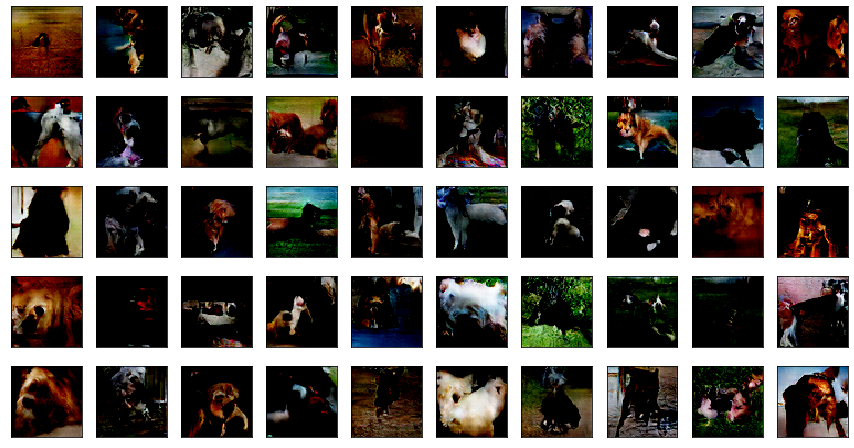

In [10]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    print(filename)
    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

['image_00761.png' '703' 'False' 'False' '0.67778736' '0.00019858945']
['image_04484.png' '130' 'False' 'False' '0.44190118' '1.3098601e-07']
['image_02584.png' '425' 'False' 'False' '0.9999975' '4.2905522e-16']
['image_09770.png' '94' 'False' 'False' '0.9693832' '5.5373017e-05']
['image_08017.png' '820' 'False' 'False' '0.841363' '0.00012320248']
['image_07541.png' '309' 'False' 'False' '0.8567648' '1.1505622e-06']
['image_06091.png' '416' 'False' 'False' '0.2904329' '0.00011677408']
['image_03027.png' '621' 'False' 'False' '0.17012525' '0.047925696']
['image_07520.png' '606' 'False' 'False' '0.55413127' '7.9664466e-07']
['image_02428.png' '145' 'False' 'False' '0.3519179' '1.7521348e-05']
['image_07239.png' '594' 'False' 'False' '0.75908834' '4.2030742e-06']
['image_02693.png' '818' 'False' 'False' '0.088513695' '0.03134998']
['image_07375.png' '716' 'False' 'False' '0.8527493' '5.518939e-05']
['image_04681.png' '607' 'False' 'False' '0.31074923' '0.00065853045']
['image_01814.png' '

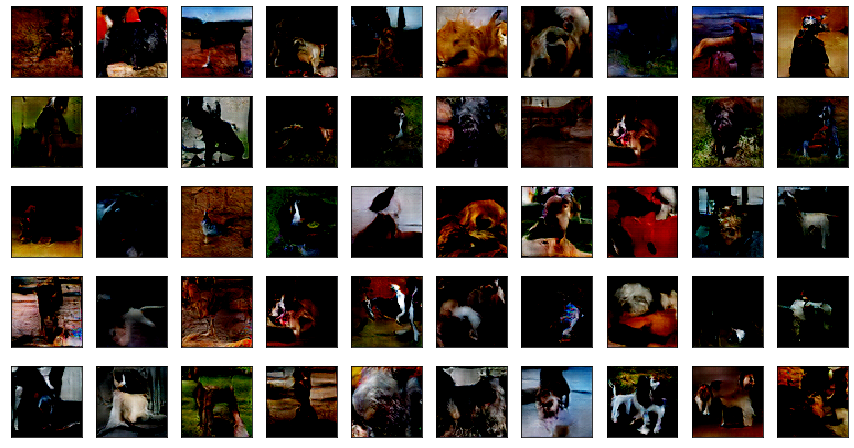

In [11]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    ind = list(res[:,0]).index(filename)
    print(res[ind])

    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

In [12]:
count = {}

for i in range(1000):
    count[i] = list(res[:,1]).count(str(i))

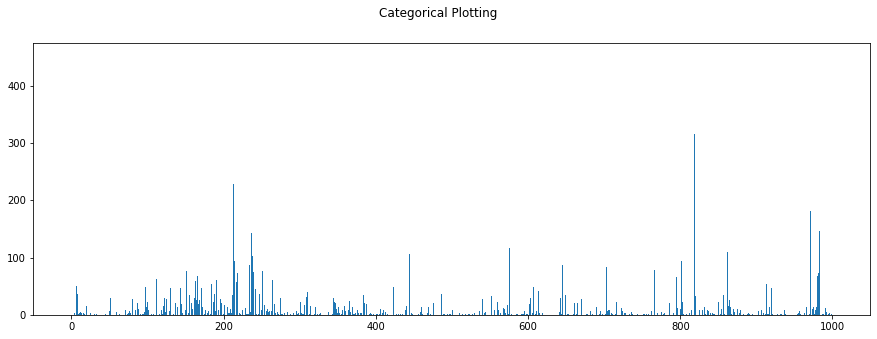

In [13]:
plt.figure(figsize=(15, 5))

plt.bar(count.keys(), count.values())
plt.suptitle('Categorical Plotting')
plt.show()

# 151~268 are dogs

In [14]:
dog = []

for i in range(len(res)):
    if res[i,2] == 'True':
        notdog.append(res[i,0])

image_01866.png
image_01098.png
image_07364.png
image_07166.png
image_07601.png
image_02187.png
image_05065.png
image_05500.png
image_06156.png
image_01534.png
image_04341.png
image_01066.png
image_01600.png
image_01375.png
image_00071.png
image_03314.png
image_09441.png
image_03126.png
image_04425.png
image_08865.png
image_03620.png
image_01917.png
image_08028.png
image_08999.png
image_08430.png
image_06680.png
image_04539.png
image_05928.png
image_08316.png
image_06967.png
image_07481.png
image_06394.png
image_01254.png
image_00590.png
image_03859.png
image_04501.png
image_09410.png
image_05379.png
image_09025.png
image_06699.png
image_07604.png
image_06693.png
image_06869.png
image_05227.png
image_06341.png
image_03127.png
image_05843.png
image_00852.png
image_00677.png
image_06857.png


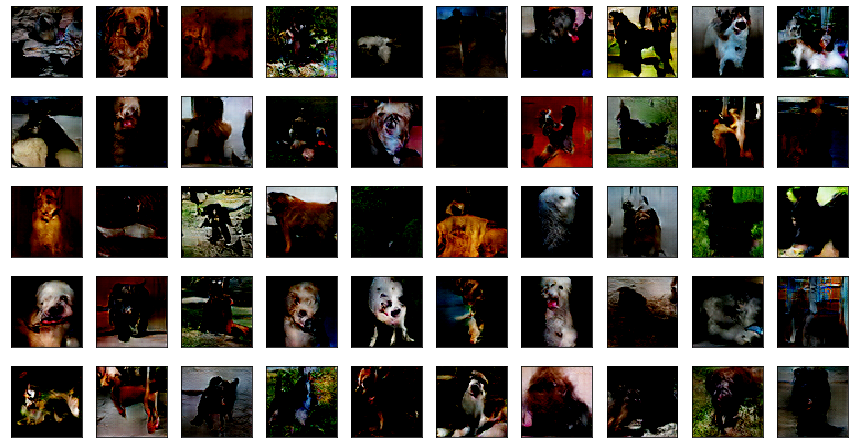

In [15]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    print(filename)
    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)